# Mini-projet - Elections
*Basé sur Hands-on Data Preprocessing, R. Jafari, 2022*

**Ce TP est noté. Merci de lire attentivement le fichier instructions.pdf avant de commencer**

Nom étudiant 1: **Gombas**

Prénom étudiant 1: **Owen**

Nom étudiant 2: **Darmanger**

Prénom étudiant 2: **David**

## Préambule

### Imports

In [202]:
# packages standards
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Dict, Tuple, Callable, Any
import re

In [203]:
# packages spécifiques
import matplotlib.image as mpimg
import seaborn as sns

### Data

In [204]:
DATA_FOLDER = os.path.join(".", "data")  # chemin relatif et nom du dossier "data"

RAW_FOLDER = os.path.join(
    DATA_FOLDER, "raw"
)  # chemin du dossier raw (ne devrait pas être changé): INPUT

PREPROCESSED_FOLDER = os.path.join(
    DATA_FOLDER, "preprocessed"
)  # chemin du dossier preprocessed (resultat du traitement raw): OUTPUT

MEDIA_FOLDER = os.path.join(
    DATA_FOLDER, "media"
)  # chemin du dossier media pour les illustrations de mise en page des notebooks

EXPLORATION_FOLDER = os.path.join(
    DATA_FOLDER, "exploration"
)  # chemin du dossier exploration pour les notebooks d'exploration

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from pandas_profiling import ProfileReport

In [206]:
# dictionnary with filename and header row
files = {
    "Education.xls": 4,
    "Unemployment.xlsx": 4,
    "PopulationEstimates.xls": 2,
    "PovertyEstimates.xls": 4,
    "countypres_2000-2020.csv": 0,
}

files

{'Education.xls': 4,
 'Unemployment.xlsx': 4,
 'PopulationEstimates.xls': 2,
 'PovertyEstimates.xls': 4,
 'countypres_2000-2020.csv': 0}

# To CSV in preprocessed

In [207]:
dfs = {}

for file in files:
    basename, ext = file.split(".")

    if ext == "xls" or ext == "xlsx":
        df = pd.read_excel(os.path.join(RAW_FOLDER, file), header=files[file])
        df.to_csv(os.path.join(PREPROCESSED_FOLDER, basename + ".csv"), index=False)
        dfs[basename] = df
    elif ext == "csv":
        df = pd.read_csv(os.path.join(RAW_FOLDER, file), header=files[file])
        df.to_csv(os.path.join(PREPROCESSED_FOLDER, basename + ".csv"), index=False)
        dfs[basename] = df

dfs

{'Education':       FIPS Code State            Area name  2003 Rural-urban Continuum Code  \
 0             0    US        United States                              NaN   
 1          1000    AL              Alabama                              NaN   
 2          1001    AL       Autauga County                              2.0   
 3          1003    AL       Baldwin County                              4.0   
 4          1005    AL       Barbour County                              6.0   
 ...         ...   ...                  ...                              ...   
 3278      72145    PR  Vega Baja Municipio                              1.0   
 3279      72147    PR    Vieques Municipio                              7.0   
 3280      72149    PR   Villalba Municipio                              2.0   
 3281      72151    PR    Yabucoa Municipio                              1.0   
 3282      72153    PR      Yauco Municipio                              3.0   
 
       2003 Urban Influen

In [208]:
dfs["countypres_2000-2020"]

year    state state_po county_name  county_fips        office  \
0      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
1      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
2      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
3      2000  ALABAMA       AL     AUTAUGA       1001.0     PRESIDENT   
4      2000  ALABAMA       AL     BALDWIN       1003.0     PRESIDENT   
...     ...      ...      ...         ...          ...           ...   
72612  2020  WYOMING       WY    WASHAKIE      56043.0  US PRESIDENT   
72613  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72614  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72615  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   
72616  2020  WYOMING       WY      WESTON      56045.0  US PRESIDENT   

               candidate        party  candidatevotes  totalvotes   version  \
0                AL GORE     DEMOCRAT          4942.0     17208.0  20191203   
1         GEORGE W. BUSH   REPUBLICAN         11993.0     17208.0  20191203   
2            RALPH NADER        GREEN           160.0     17208.0  20191203   
3                  OTHER        OTHER           113.0     17208.0  20191203   
4                AL GORE     DEMOCRAT         13997.0     56480.0  20191203   
...                  ...          ...             ...         ...       ...   
72612     DONALD J TRUMP   REPUBLICAN          3245.0      4032.0  20210622   
72613  JOSEPH R BIDEN JR     DEMOCRAT           360.0      3560.0  20210622   
72614       JO JORGENSEN  LIBERTARIAN            46.0      3560.0  20210622   
72615              OTHER        OTHER            47.0      3560.0  20210622   
72616     DONALD J TRUMP   REPUBLICAN          3107.0      3560.0  20210622   

        mode  
0      TOTAL  
1      TOTAL  
2      TOTAL  
3      TOTAL  
4      TOTAL  
...      ...  
72612  TOTAL  
72613  TOTAL  
72614  TOTAL  
72615  TOTAL  
72616  TOTAL  

[72617 rows x 12 columns]

In [209]:
dfs["Education"]

FIPS Code State            Area name  2003 Rural-urban Continuum Code  \
0             0    US        United States                              NaN   
1          1000    AL              Alabama                              NaN   
2          1001    AL       Autauga County                              2.0   
3          1003    AL       Baldwin County                              4.0   
4          1005    AL       Barbour County                              6.0   
...         ...   ...                  ...                              ...   
3278      72145    PR  Vega Baja Municipio                              1.0   
3279      72147    PR    Vieques Municipio                              7.0   
3280      72149    PR   Villalba Municipio                              2.0   
3281      72151    PR    Yabucoa Municipio                              1.0   
3282      72153    PR      Yauco Municipio                              3.0   

      2003 Urban Influence Code  2013 Rural-urban Continuum Code  \
0                           NaN                              NaN   
1                           NaN                              NaN   
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
...                         ...                              ...   
3278                        1.0                              1.0   
3279                       12.0                              7.0   
3280                        2.0                              2.0   
3281                        1.0                              1.0   
3282                        2.0                              2.0   

      2013 Urban Influence Code  Less than a high school diploma, 1970  \
0                           NaN                             52373312.0   
1                           NaN                              1062306.0   
2                           2.0                                 6611.0   
3                           2.0                                18726.0   
4                           6.0                                 8120.0   
...                         ...                                    ...   
3278                        1.0                                    NaN   
3279                       12.0                                    NaN   
3280                        2.0                                    NaN   
3281                        1.0                                    NaN   
3282                        2.0                                    NaN   

      High school diploma only, 1970  Some college (1-3 years), 1970  ...  \
0                         34158051.0                      11650730.0  ...   
1                           468269.0                        136287.0  ...   
2                             3757.0                           933.0  ...   
3                             8426.0                          2334.0  ...   
4                             2242.0                           581.0  ...   
...                              ...                             ...  ...   
3278                             NaN                             NaN  ...   
3279                             NaN                             NaN  ...   
3280                             NaN                             NaN  ...   
3281                             NaN                             NaN  ...   
3282                             NaN                             NaN  ...   

      Percent of adults completing some college or associate's degree, 2000  \
0                                                  27.4                       
1                                                  25.9                       
2                                                  26.9                       
3                                                  29.3                       
4                              

In [210]:
dfs["PovertyEstimates"]

FIPStxt Stabr          Area_name  Rural-urban_Continuum_Code_2003  \
0           0    US      United States                              NaN   
1        1000    AL            Alabama                              NaN   
2        1001    AL     Autauga County                              2.0   
3        1003    AL     Baldwin County                              4.0   
4        1005    AL     Barbour County                              6.0   
...       ...   ...                ...                              ...   
3188    56037    WY  Sweetwater County                              5.0   
3189    56039    WY       Teton County                              7.0   
3190    56041    WY       Uinta County                              7.0   
3191    56043    WY    Washakie County                              7.0   
3192    56045    WY      Weston County                              7.0   

      Urban_Influence_Code_2003  Rural-urban_Continuum_Code_2013  \
0                           NaN                              NaN   
1                           NaN                              NaN   
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
...                         ...                              ...   
3188                        8.0                              5.0   
3189                        8.0                              7.0   
3190                        8.0                              7.0   
3191                       11.0                              7.0   
3192                        9.0                              7.0   

      Urban_Influence_Code_2013  POVALL_2019  CI90LBALL_2019  CI90UBALL_2019  \
0                           NaN     39490096        39248096        39732096   
1                           NaN       747478          730491          764465   
2                           2.0         6723            5517            7929   
3                           2.0        22360           18541           26179   
4                           6.0         5909            4787            7031   
...                         ...          ...             ...             ...   
3188                        8.0         3453            2743            4163   
3189                        8.0         1396            1073            1719   
3190                        8.0         1699            1264            2134   
3191                       11.0          845             626            1064   
3192                        9.0          692             523             861   

      ...  CI90UB517P_2019  MEDHHINC_2019  CI90LBINC_2019  CI90UBINC_2019  \
0     ...             16.0          65712           65594           65830   
1     ...             21.6          51771           51179           52363   
2     ...             19.4          58233           52517           63949   
3     ...             17.2          59871           54593           65149   
4     ...             49.0          35972           31822           40122   
...   ...              ...            ...             ...             ...   
3188  ...             11.1          80639           73437           87841   
3189  ...              6.7          98837           86531          111143   
3190  ...             11.1          70756           63191           78321   
3191  ...             17.4          55122           50050           60194   
3192  ...             16.7          59410           52275           66545   

      POV04_2019  CI90LB04_2019  CI90UB04_2019  PCTPOV04_2019  CI90LB04P_2019  \
0      3457689.0      3405854.0      3509524.0           18.2            17.9   
1        69236.0        65296.0        73176.0           24.2            22.8   
2            NaN            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN            NaN             NaN 

In [211]:
dfs["Unemployment"]

FIPS_Code State                Area_name  \
0             0    US            United States   
1          1000    AL                  Alabama   
2          1001    AL       Autauga County, AL   
3          1003    AL       Baldwin County, AL   
4          1005    AL       Barbour County, AL   
...         ...   ...                      ...   
3270      72145    PR  Vega Baja Municipio, PR   
3271      72147    PR    Vieques Municipio, PR   
3272      72149    PR   Villalba Municipio, PR   
3273      72151    PR    Yabucoa Municipio, PR   
3274      72153    PR      Yauco Municipio, PR   

      Rural_urban_continuum_code_2013  Urban_influence_code_2013  Metro_2013  \
0                                 NaN                        NaN         NaN   
1                                 NaN                        NaN         NaN   
2                                 2.0                        2.0         1.0   
3                                 3.0                        2.0         1.0   
4                                 6.0                        6.0         0.0   
...                               ...                        ...         ...   
3270                              1.0                        1.0         1.0   
3271                              7.0                       12.0         0.0   
3272                              2.0                        2.0         1.0   
3273                              1.0                        1.0         1.0   
3274                              2.0                        2.0         1.0   

      Civilian_labor_force_2000  Employed_2000  Unemployed_2000  \
0                   142601576.0    136904853.0        5696723.0   
1                     2147173.0      2047731.0          99442.0   
2                       21861.0        20971.0            890.0   
3                       69979.0        67370.0           2609.0   
4                       11449.0        10812.0            637.0   
...                         ...            ...              ...   
3270                    19805.0        17607.0           2198.0   
3271                     2441.0         2120.0            321.0   
3272                     7636.0         6648.0            988.0   
3273                    10613.0         9005.0           1608.0   
3274                    14664.0        12871.0           1793.0   

      Unemployment_rate_2000  ...  Civilian_labor_force_2019  Employed_2019  \
0                   3.994853  ...                163140305.0    157154185.0   
1                   4.600000  ...                  2237278.0      2169395.0   
2                   4.100000  ...                    26281.0        25561.0   
3                   3.700000  ...                    97424.0        94713.0   
4                   5.600000  ...                     8502.0         8177.0   
...                      ...  ...                        ...            ...   
3270               11.100000  ...                    13172.0        11910.0   
3271               13.200000  ...                     2616.0         2433.0   
3272               12.900000  ...                     7492.0         6307.0   
3273               15.200000  ...                     8840.0         7685.0   
3274               12.200000  ...                     9849.0         8407.0   

      Unemployed_2019  Unemployment_rate_2019  Civilian_labor_force_2020  \
0           5986120.0                3.669308                160611064.0   
1             67883.0                3.000000                  2230118.0   
2               720.0                2.700000                    25838.0   
3              2711.0                2.800000                    96763.0   
4               325.0                3.800000                     8587.0   
...               ...                     ...                        ...   
3270           1262.0                9.600000                        NaN   
3271            183.0                7.000000                        NaN   
3272  

In [212]:
dfs["PopulationEstimates"]

FIPStxt State                         Area_Name  \
0           0    US                     United States   
1        1000    AL                           Alabama   
2        1001    AL                    Autauga County   
3        1003    AL                    Baldwin County   
4        1005    AL                    Barbour County   
...       ...   ...                               ...   
3268    72145    PR  Vega Baja Municipio, Puerto Rico   
3269    72147    PR    Vieques Municipio, Puerto Rico   
3270    72149    PR   Villalba Municipio, Puerto Rico   
3271    72151    PR    Yabucoa Municipio, Puerto Rico   
3272    72153    PR      Yauco Municipio, Puerto Rico   

      Rural-urban_Continuum Code_2003  Rural-urban_Continuum Code_2013  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 2.0                              2.0   
3                                 4.0                              3.0   
4                                 6.0                              6.0   
...                               ...                              ...   
3268                              1.0                              1.0   
3269                              7.0                              7.0   
3270                              2.0                              2.0   
3271                              1.0                              1.0   
3272                              3.0                              2.0   

      Urban_Influence_Code_2003  Urban_Influence_Code_2013  \
0                           NaN                        NaN   
1                           NaN                        NaN   
2                           2.0                        2.0   
3                           5.0                        2.0   
4                           6.0                        6.0   
...                         ...                        ...   
3268                        1.0                        1.0   
3269                       12.0                       12.0   
3270                        2.0                        2.0   
3271                        1.0                        1.0   
3272                        2.0                        2.0   

      Economic_typology_2015  CENSUS_2010_POP  ESTIMATES_BASE_2010  ...  \
0                        NaN        308745538            308758105  ...   
1                        NaN          4779736              4780125  ...   
2                        0.0            54571                54597  ...   
3                        5.0           182265               182265  ...   
4                        3.0            27457                27455  ...   
...                      ...              ...                  ...  ...   
3268                     NaN            59662                59662  ...   
3269                     NaN             9301                 9301  ...   
3270                     NaN            26073                26073  ...   
3271                     NaN            37941                37941  ...   
3272                     NaN            42043                41947  ...   

      R_DOMESTIC_MIG_2019  R_NET_MIG_2011  R_NET_MIG_2012  R_NET_MIG_2013  \
0                     NaN             NaN             NaN             NaN   
1                1.917501        0.578434        1.186314        1.522549   
2                4.847310        6.018182       -6.226119       -3.902226   
3               24.017829       16.641870       17.488579       22.751474   
4               -5.690302        0.292676       -6.897817       -8.132185   
...                   ...             ...             ...             ...   
3268                  NaN             NaN             NaN             NaN   
3269                  NaN             NaN             NaN             NaN   
3270                  NaN             NaN             NaN             NaN   
3271            

# Describe each dataframes

In [213]:
def describe_df(df):
    print("Shape:", df.shape, end="\n\n")
    print(f"{len(df.columns)} columns:", df.columns, end="\n\n")
    print("Index:", df.index, end="\n\n")
    print("Dtypes:", df.dtypes, end="\n\n")
    print("Nulls:", df.isnull().sum(), end="\n\n")
    print("Unique values:", df.nunique(), end="\n\n")

In [214]:
for key in dfs:
    print(key)
    describe_df(dfs[key])
    print("\n" * 4 + "=" * 100 + "\n" * 4)

Education
Shape: (3283, 47)

47 columns: Index(['FIPS Code', 'State', 'Area name', '2003 Rural-urban Continuum Code',
       '2003 Urban Influence Code', '2013 Rural-urban Continuum Code',
       '2013 Urban Influence Code', 'Less than a high school diploma, 1970',
       'High school diploma only, 1970', 'Some college (1-3 years), 1970',
       'Four years of college or higher, 1970',
       'Percent of adults with less than a high school diploma, 1970',
       'Percent of adults with a high school diploma only, 1970',
       'Percent of adults completing some college (1-3 years), 1970',
       'Percent of adults completing four years of college or higher, 1970',
       'Less than a high school diploma, 1980',
       'High school diploma only, 1980', 'Some college (1-3 years), 1980',
       'Four years of college or higher, 1980',
       'Percent of adults with less than a high school diploma, 1980',
       'Percent of adults with a high school diploma only, 1980',
       'Percent of 

# Count how many element each column has

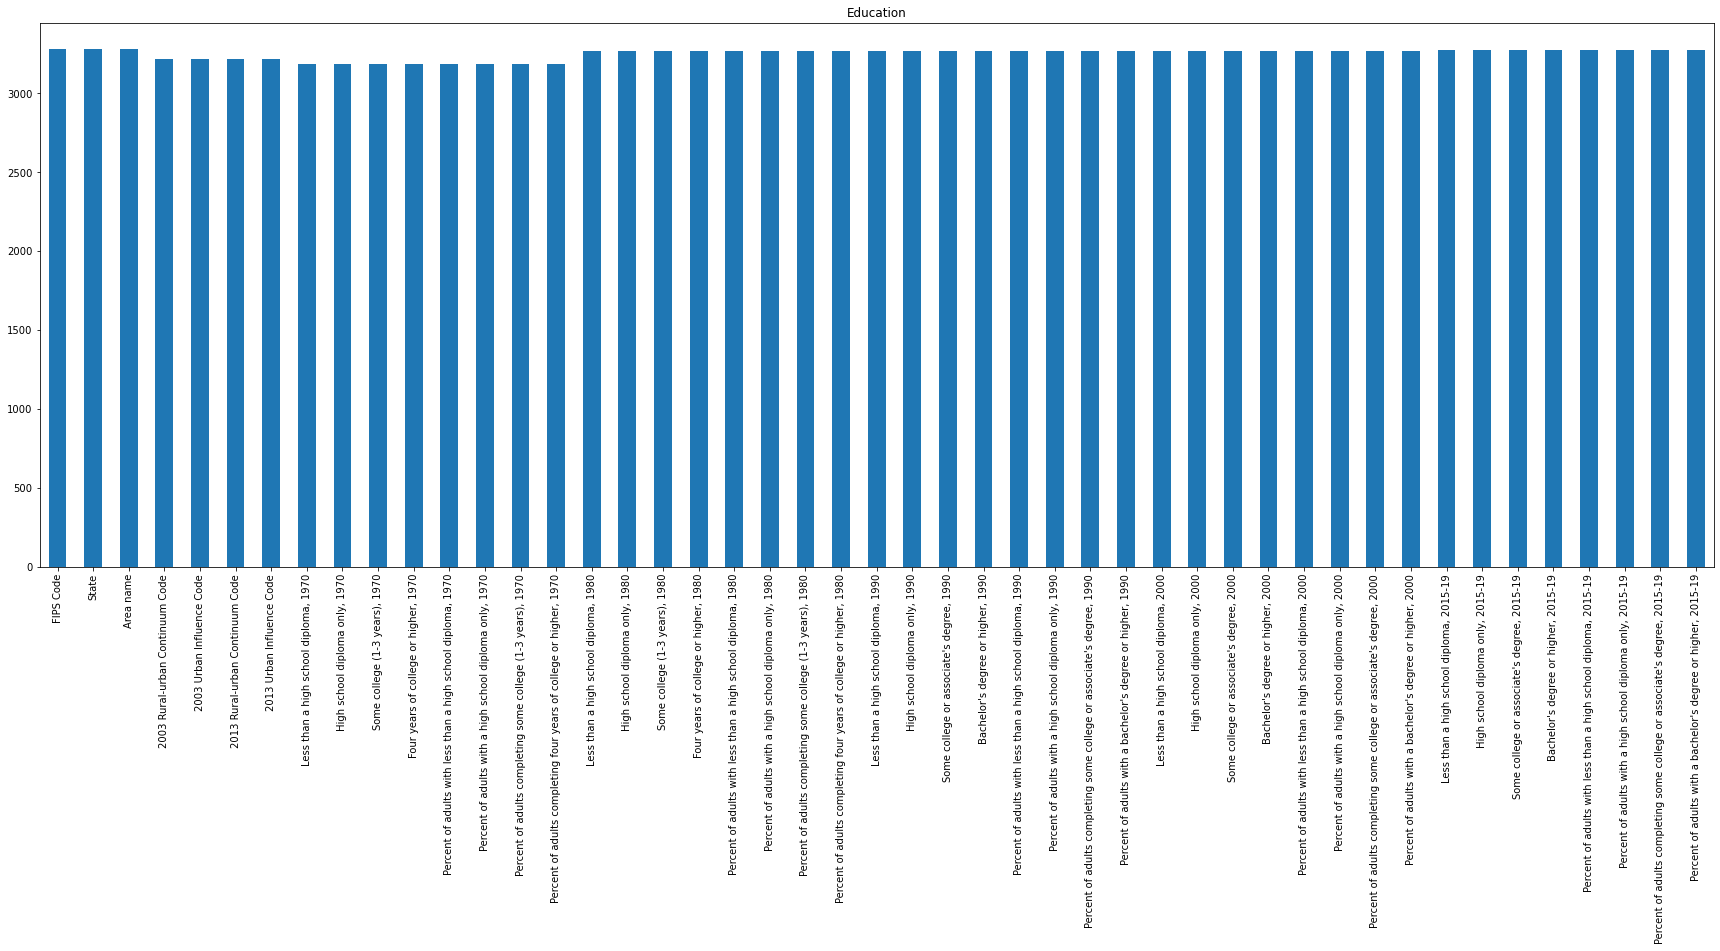

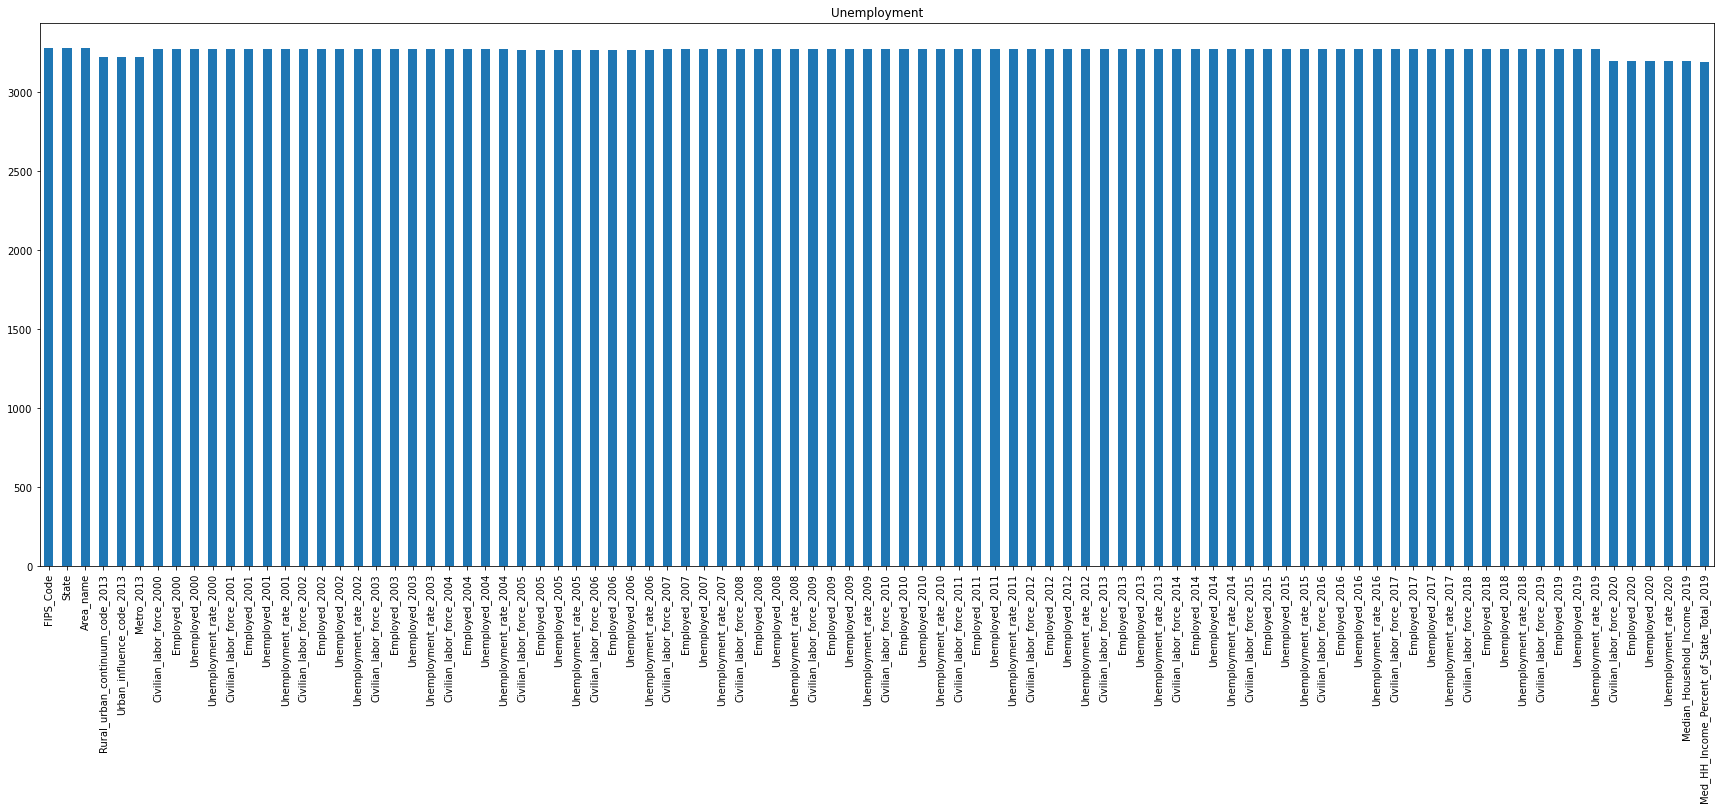

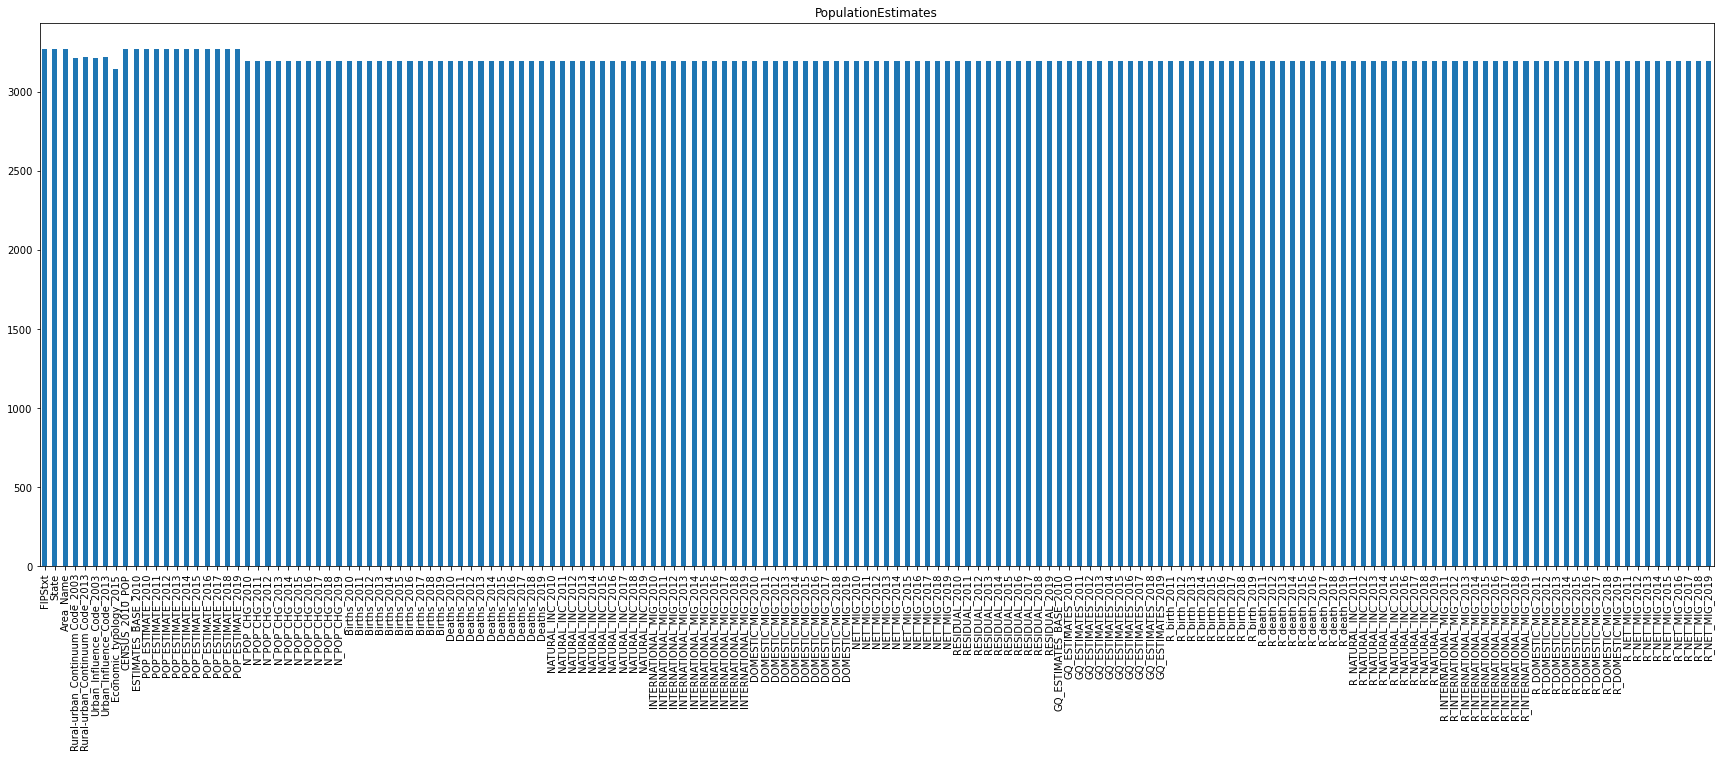

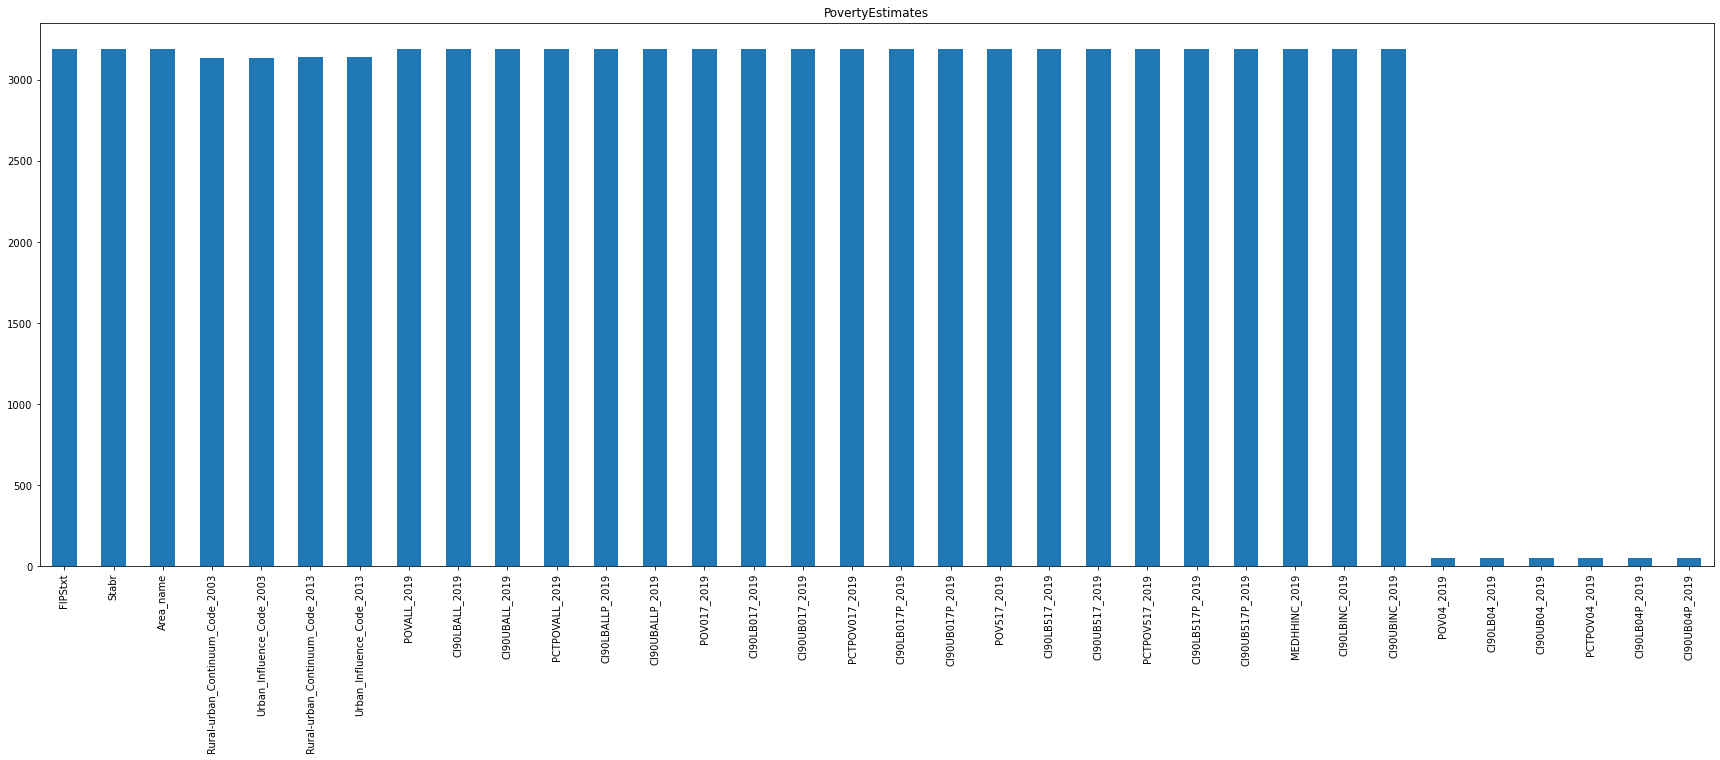

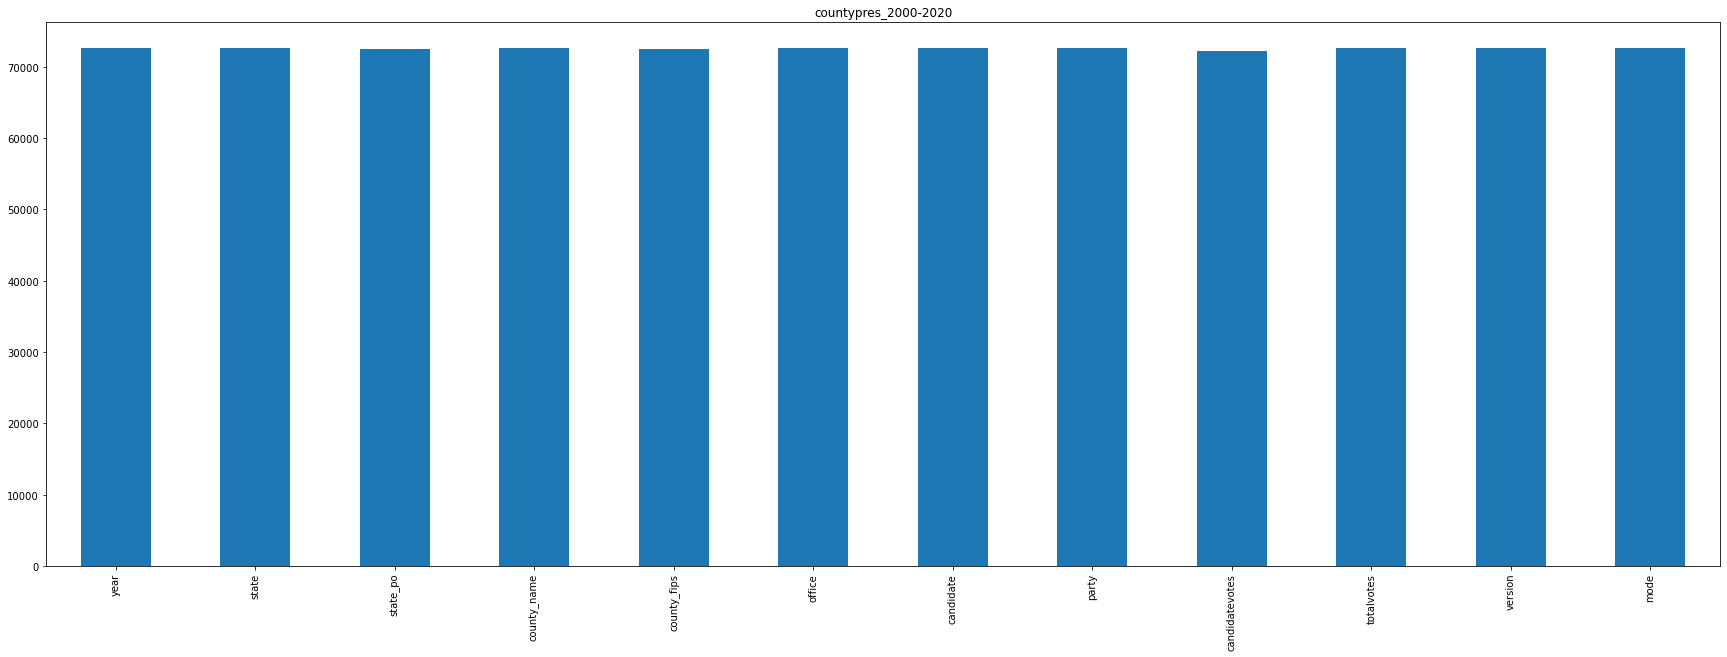

In [215]:
for key in dfs:
    fig = plt.figure(figsize=(30, 10))
    plt.title(key)
    dfs[key].count().plot(kind="bar")

# Show NaN

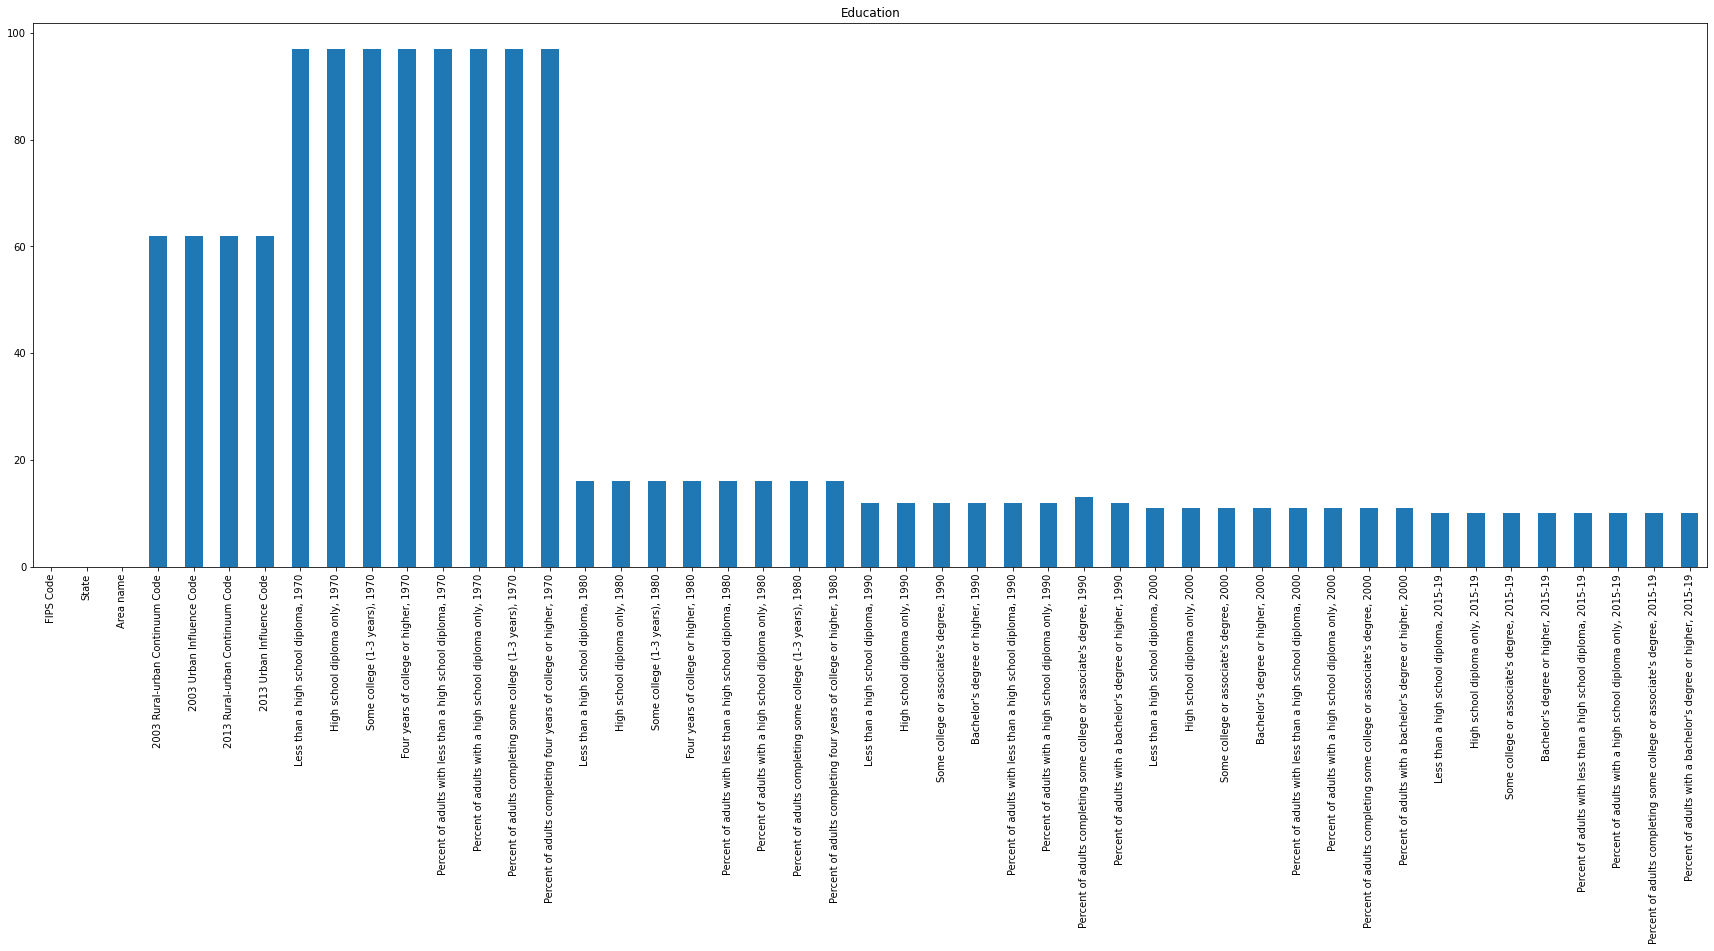

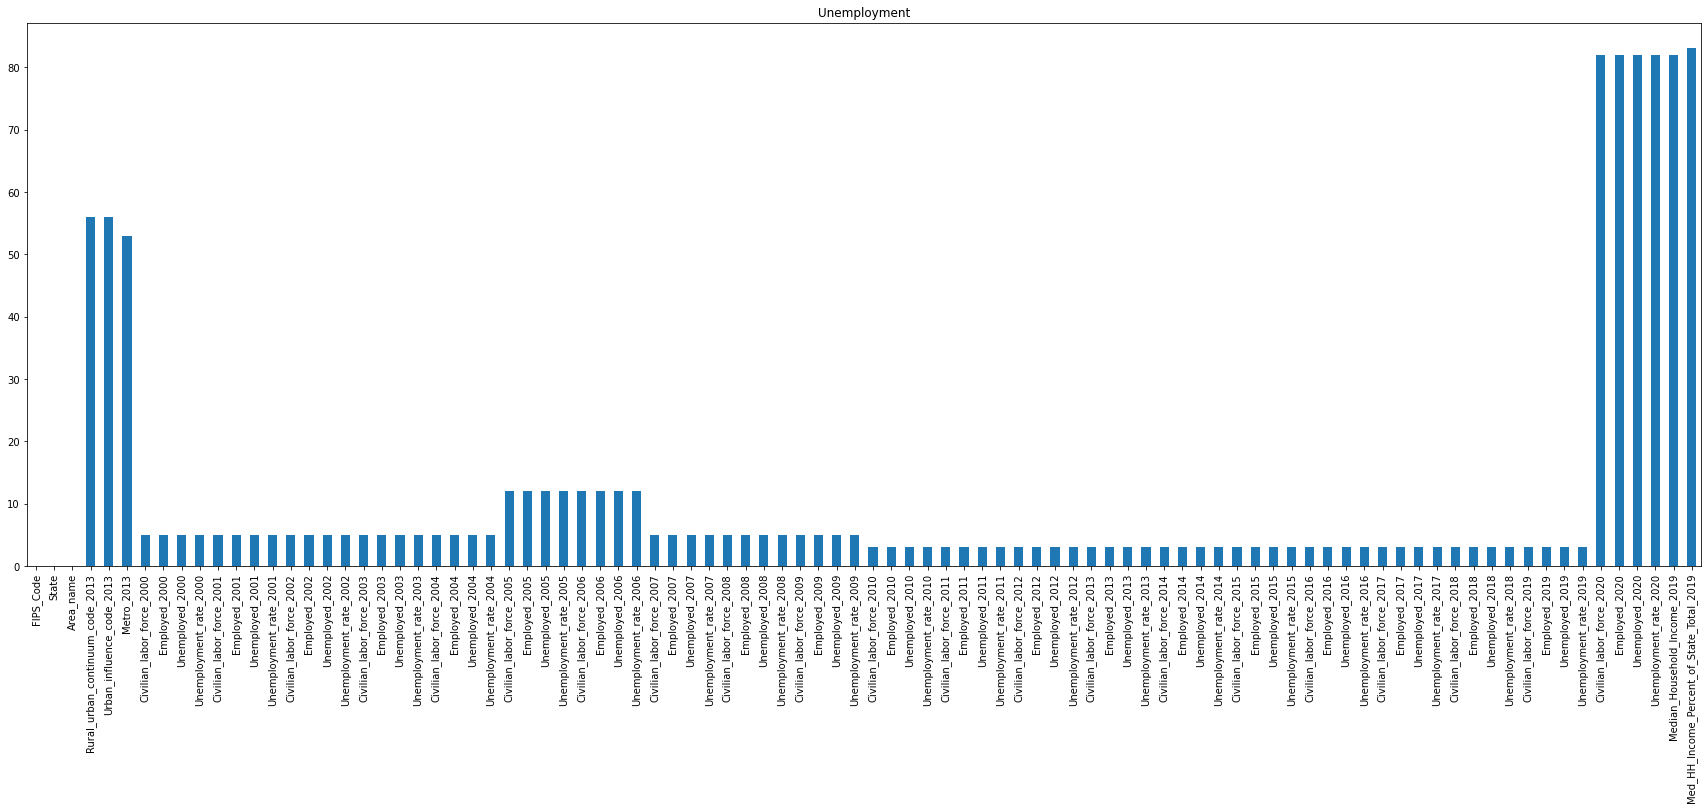

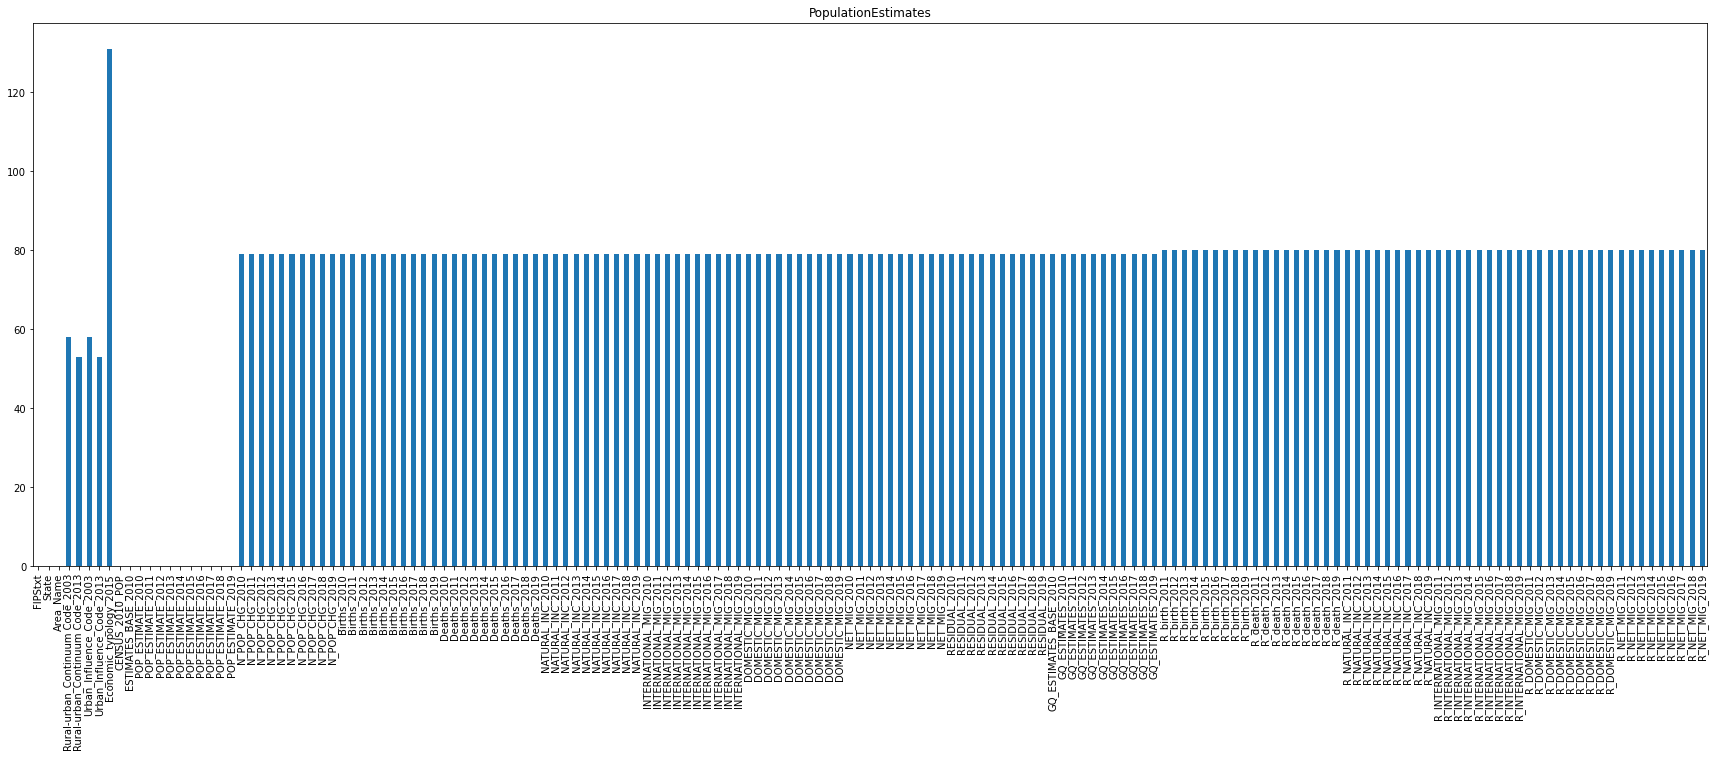

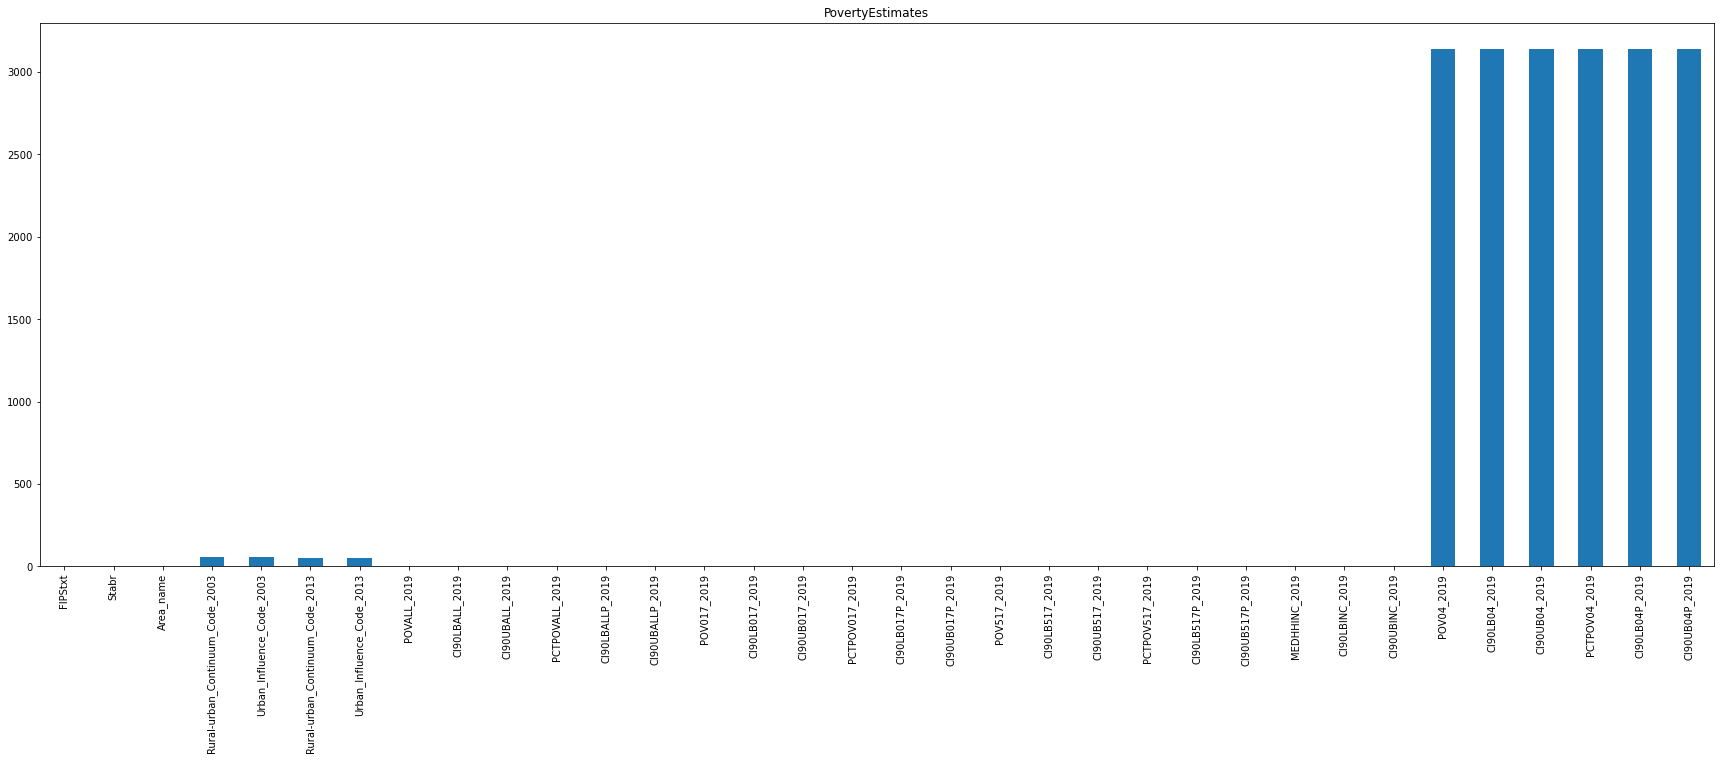

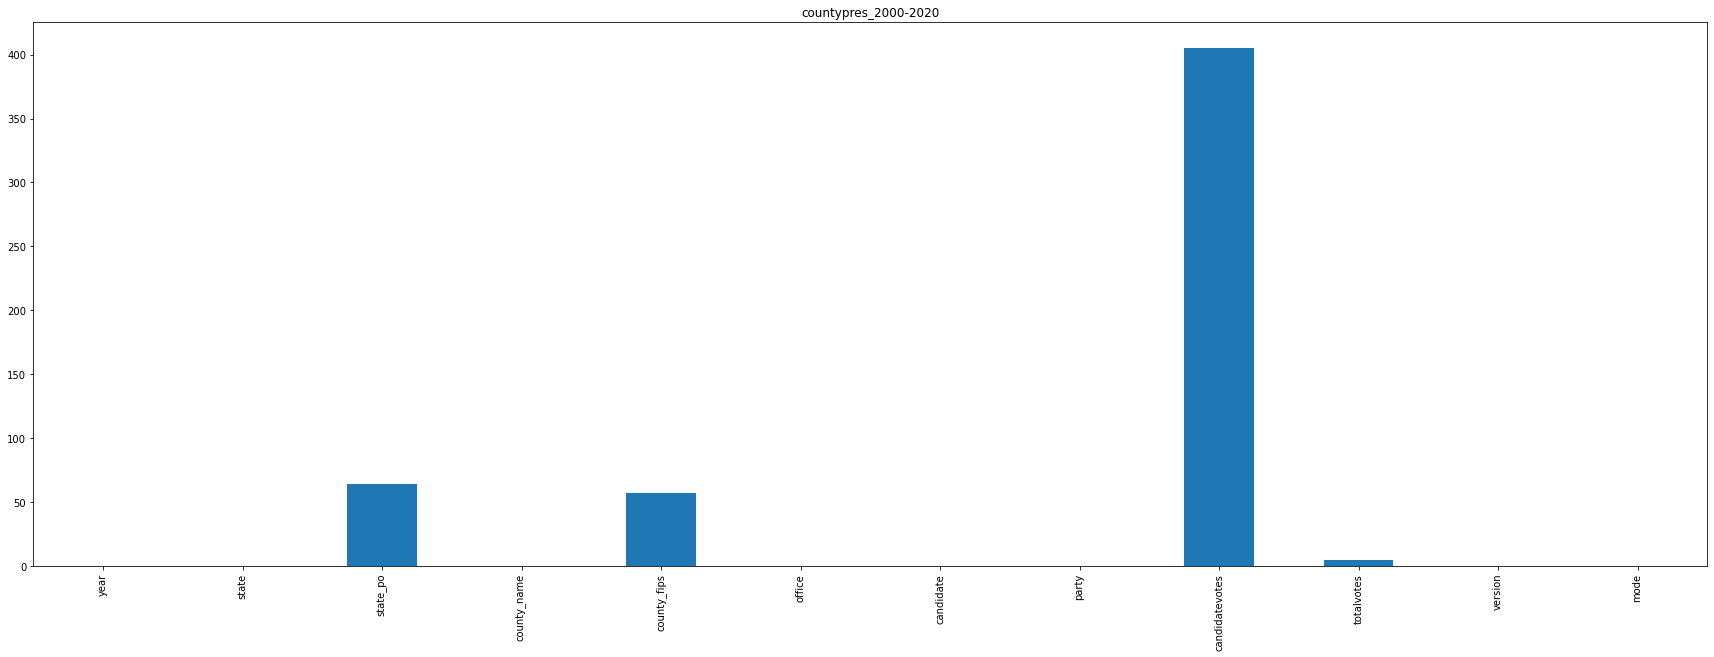

In [216]:
for key in dfs:
    fig = plt.figure(figsize=(30, 10))
    plt.title(key)
    dfs[key].isnull().sum().plot(kind="bar")

# Show not uniques

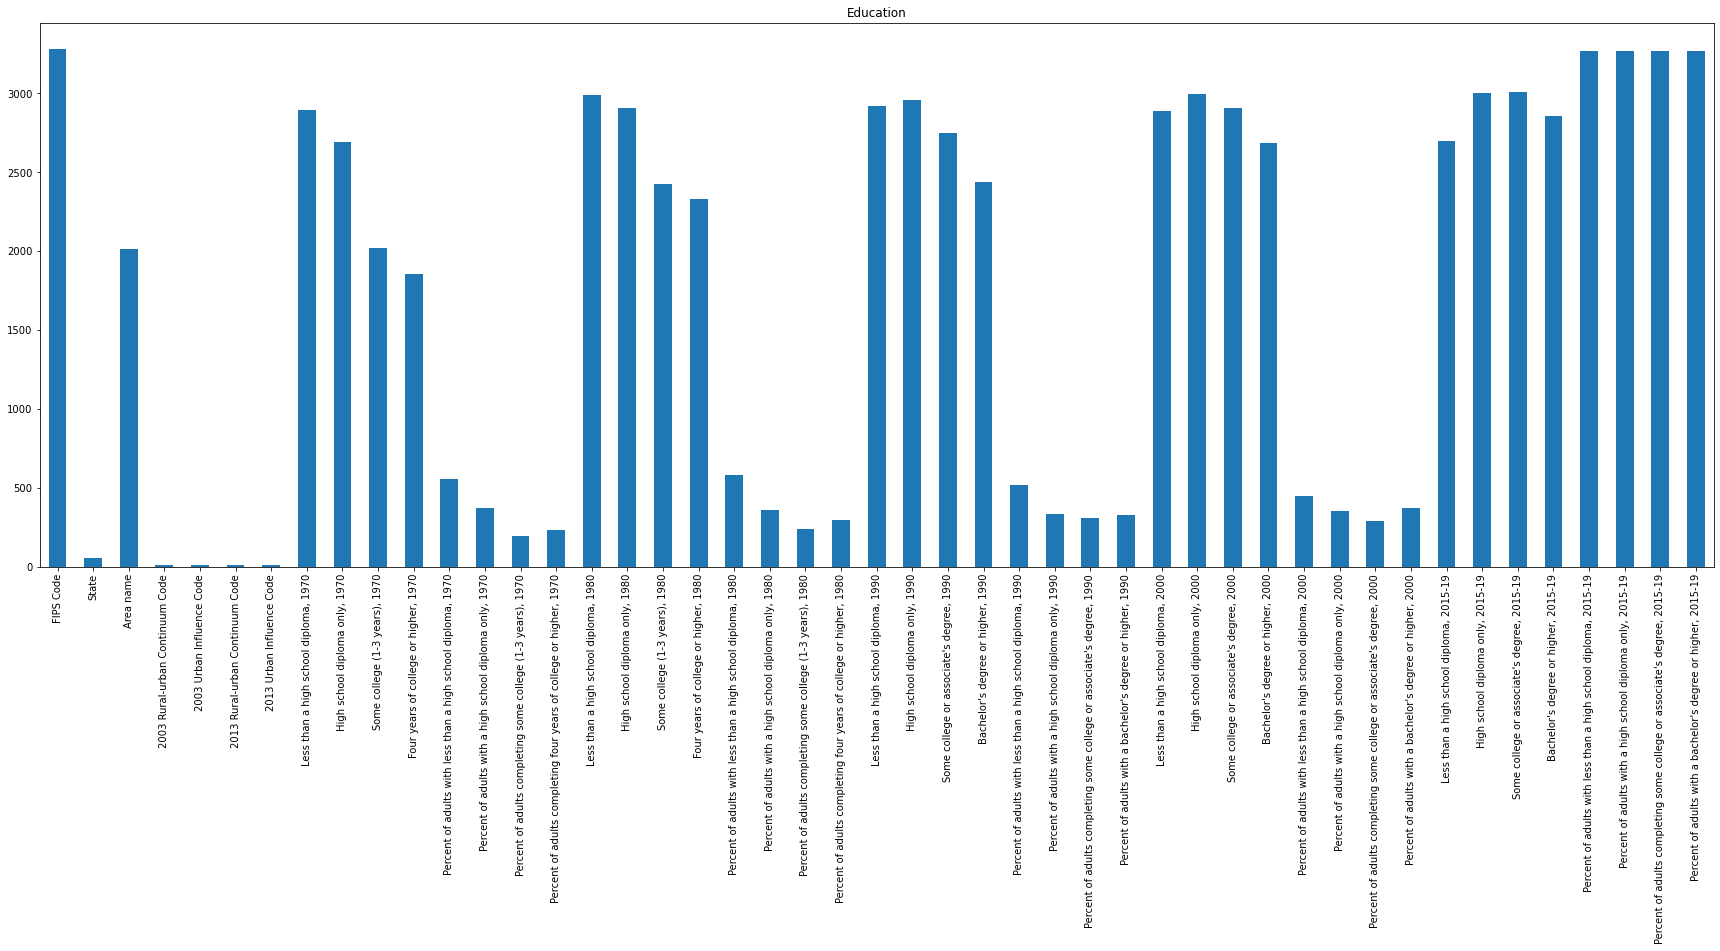

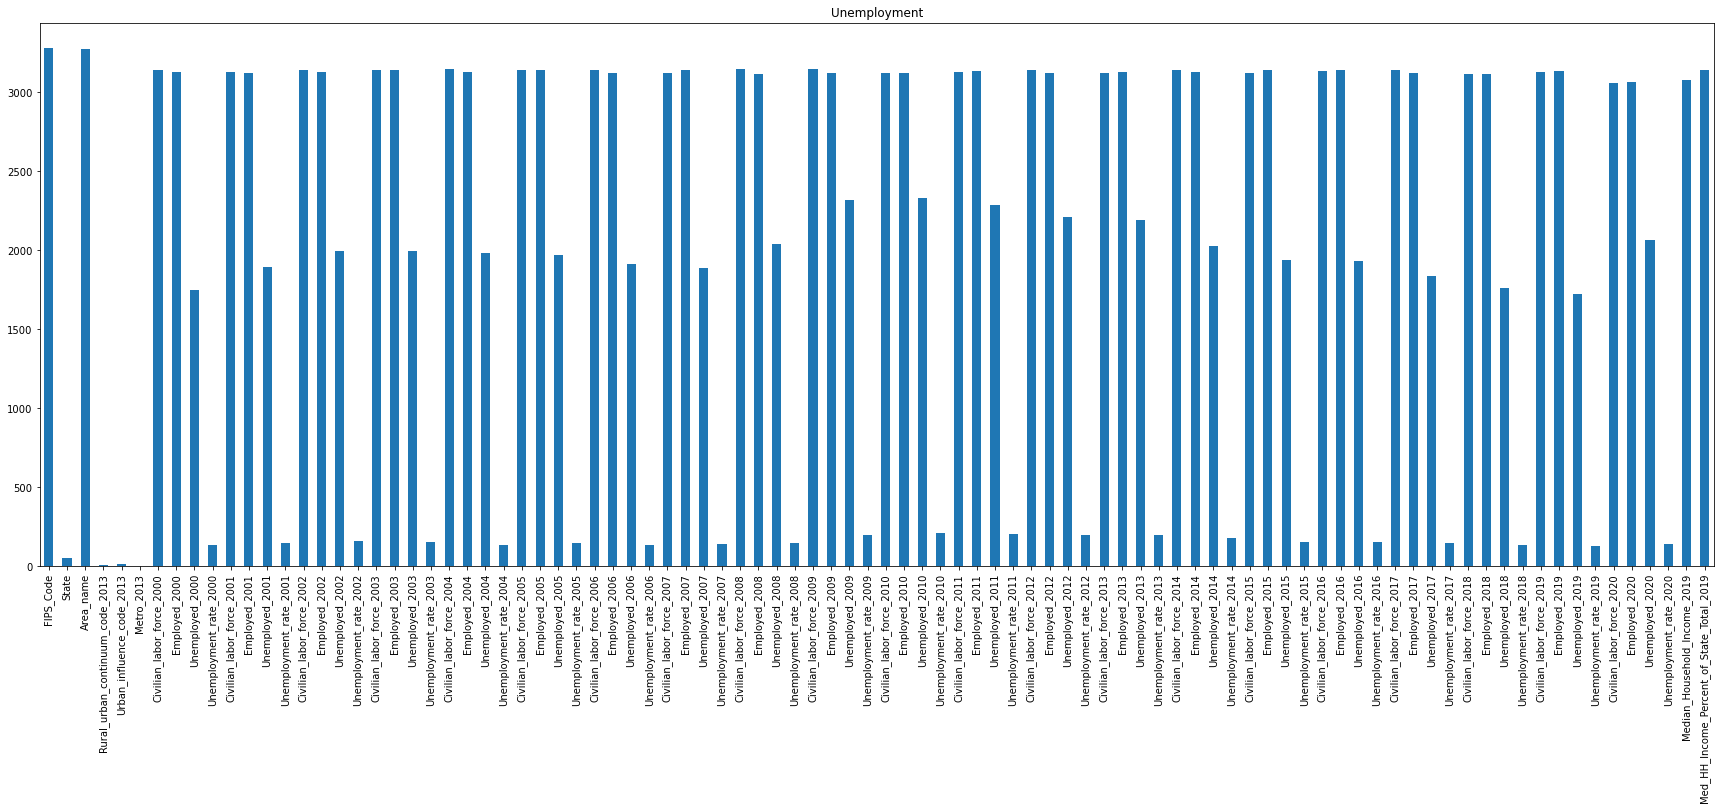

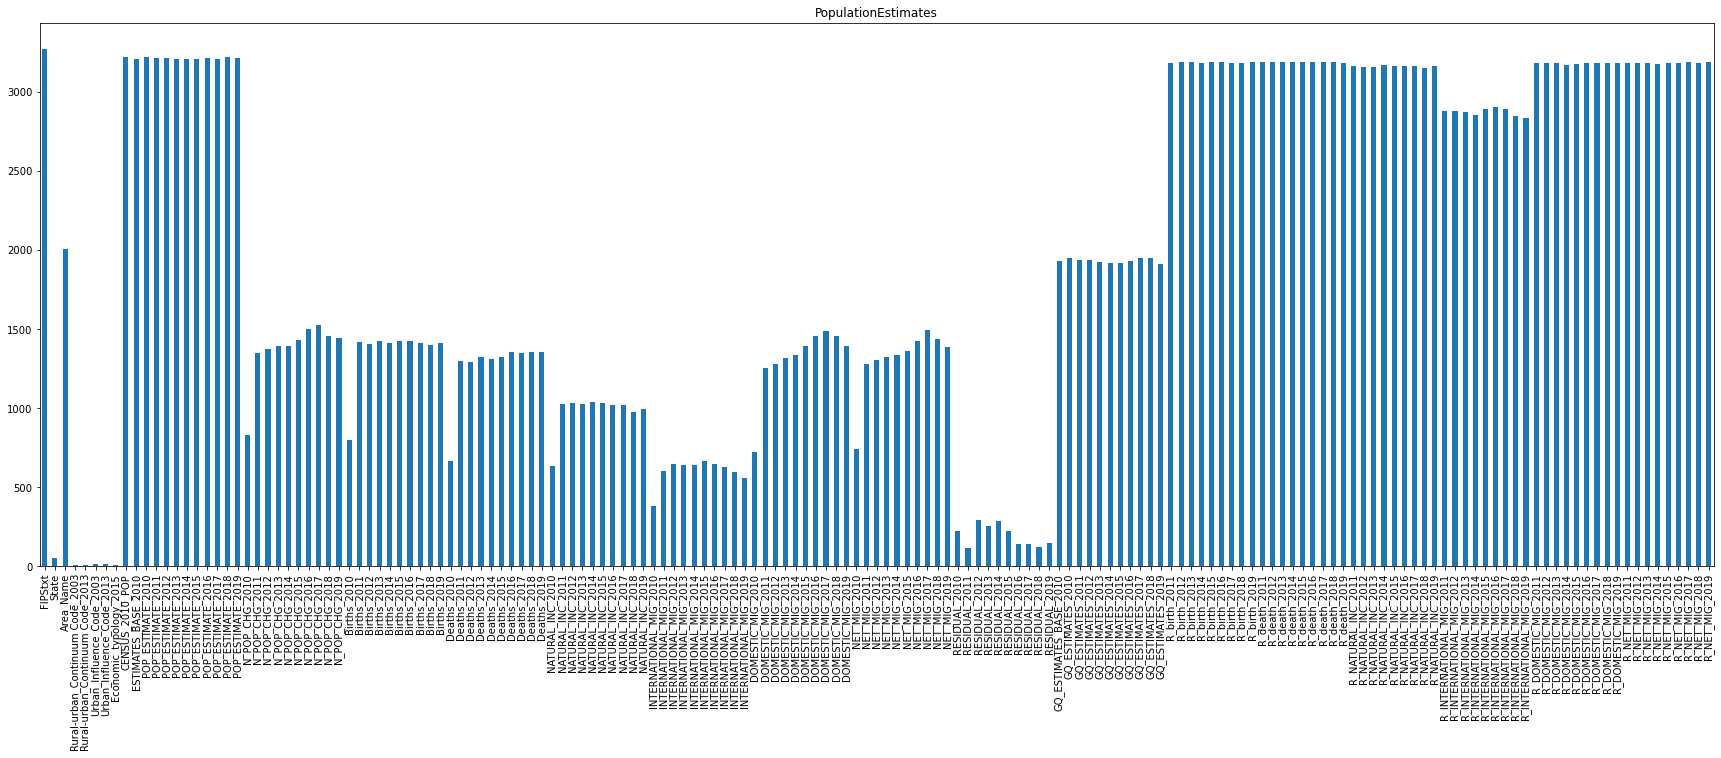

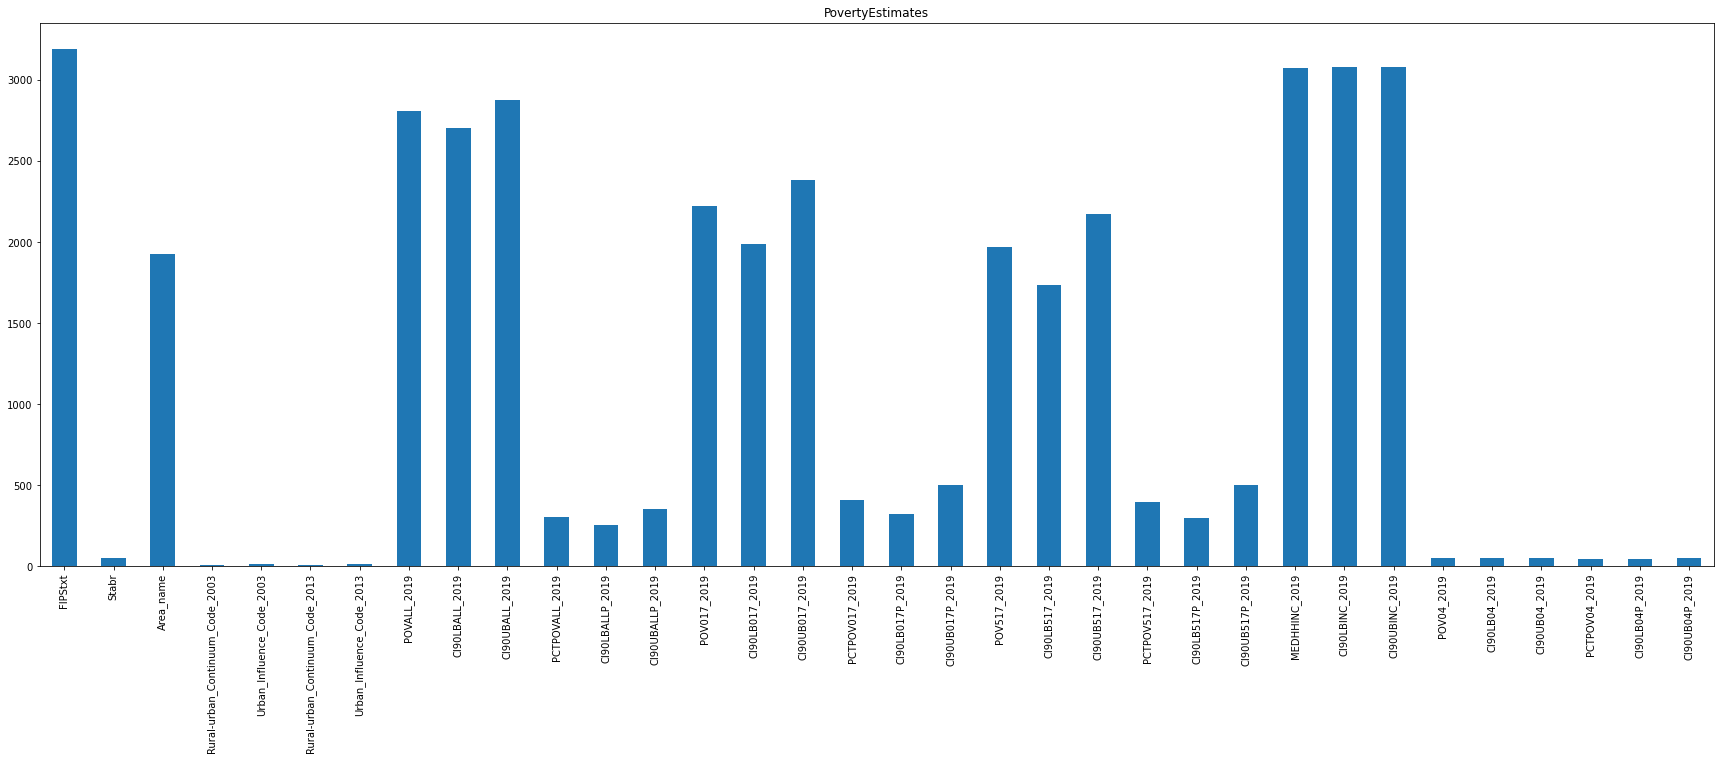

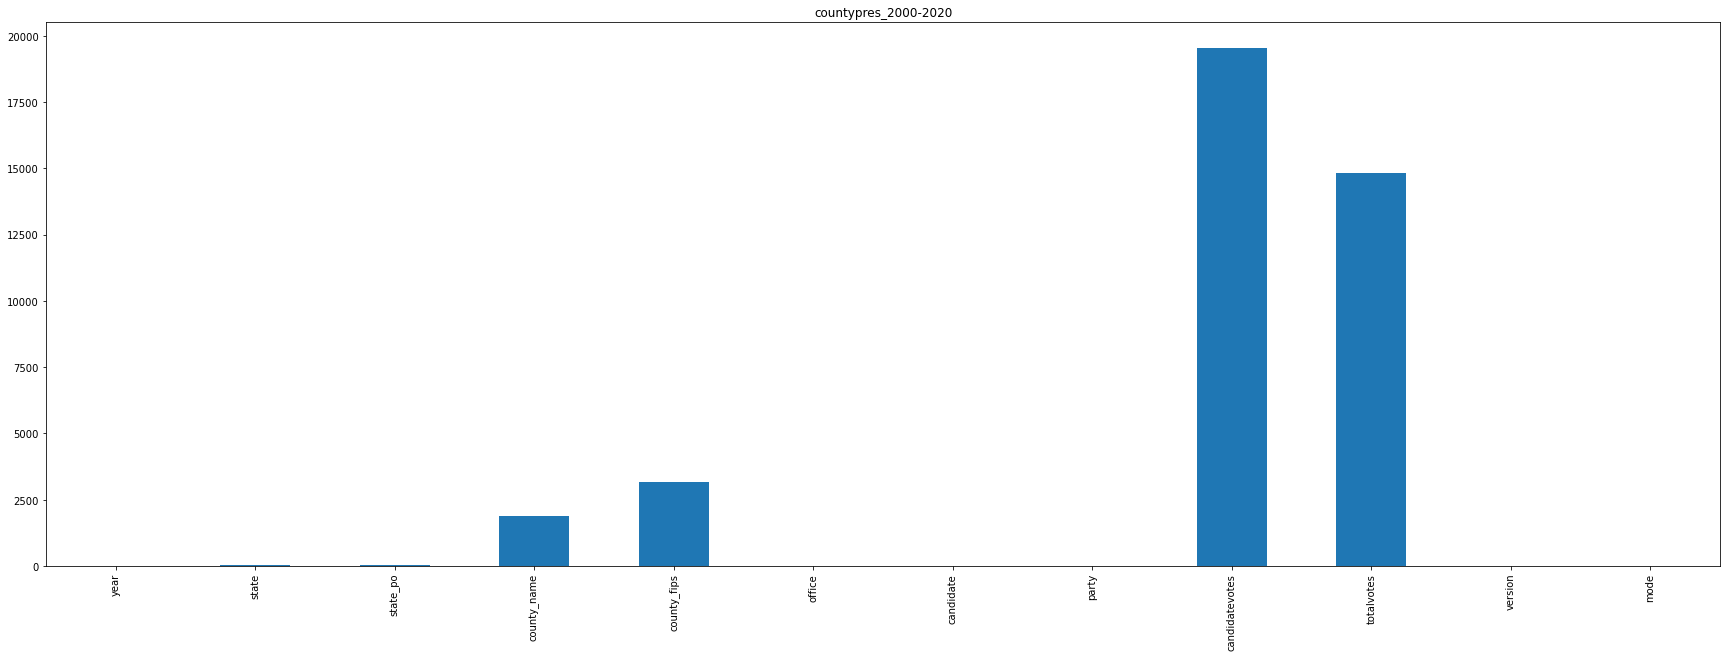

In [217]:
for key in dfs:
    fig = plt.figure(figsize=(30, 10))
    plt.title(key)
    dfs[key].nunique().plot(kind="bar")

# Les 3 niveaux de nettoyage
1. Les manipulation génériques (i.e., non spécifique à une application)
2. Les restructurations pour un outil d’analyse spécifique (ex.: Tableau, Excel, Plotly, SPSS, ...)
3. L’interprétation des valeurs et les restructurations pour un objectif d’analyse spécifique ou une problématique donnée, e.g.,
   1. «Quelle est le prix pour une maison de 200m2 dans ce secteur?»,
   2. «Quel accessoire recommander si l’utilisateur vient d’acheter ce téléphone portable?»
   3. «Quel est le lien entre les facteurs sociaux et le tabagisme?»

# Valeurs manquantes
Pour choisir, il faut comprendre l’objectif de l’analyse et l’impact des valeurs manquantes

- (Les laisser manquantes)
- Supprimer les lignes concernées
- Supprimer les colonnes concernées
- Estimer et imputer une valeur

## Types de valeurs manquantes

### Manquante aléatoirement
- Pas de cause systématique (aléa(s) unique(s) ou dysfonctionnement aléatoire)
- Elles sont inévitables

### Manquante systématiquement
- Cause systématique, potentiellement prédictible
- On peut les éviter en changeant le processus de collecte
  
## Traitement des valeurs manquantes

### Functions

In [218]:
def is_state(df: pd.DataFrame, fips_column: str = "fips"):
    return df[fips_column].apply(lambda x: str(x)[-3:] == "000")

In [219]:
def delete_us(df: pd.DataFrame):
    return df[df["state"] != "US"]

In [220]:
def delete_states(df: pd.DataFrame, fips_column: str = "fips"):
    return df[~is_state(df, fips_column)]

In [221]:
def delete_pr(df: pd.DataFrame):
    return df[df["state"] != "PR"]

In [222]:
def fill_numeric_columns(df: pd.DataFrame, method=Callable[[pd.DataFrame], Any]):
    numeric_cols = df.select_dtypes(include=np.number).columns
    df.loc[:, numeric_cols] = df[numeric_cols].fillna(method(df[numeric_cols]))
    return df

In [223]:
def save_df(df: pd.DataFrame, name: str):
    df.to_csv(os.path.join(PREPROCESSED_FOLDER, name + ".csv"), index=False)
    return df

In [224]:
def show_na(df: pd.DataFrame):
    nulls = df.isnull().sum()[df.isnull().sum() > 0].to_dict()
    
    if len(nulls) == 0:
        print("No null values")
        return 0

    for key, value in nulls.items():
        print(f"{key}: {value}")
    
    # show rows with null values
    nulls_df = df[df.isnull().any(axis=1)]

    # print rows of nulls_df
    for i in range(len(nulls_df)):
        r = ""
        for key, value in nulls_df.iloc[i].to_dict().items():
            r += f"{key}: {value} | "
        print(r)

    fig = plt.figure(figsize=(30, 10))
    df.isnull().sum().plot(kind="bar")

    return len(nulls_df)

In [225]:
def normalize_columns(df: pd.DataFrame, fips_column: str = "fips", state_column: str = "state"):
    if state_column in df.columns:
        df.rename(columns={state_column: "state"}, inplace=True)

    if fips_column in df.columns:
        df[fips_column] = df[fips_column].astype(str)
        df[fips_column] = df[fips_column].apply(lambda x: x.zfill(5))
        df.rename(columns={fips_column: "fips"}, inplace=True)

    df.columns = [col.lower().replace(" ", "_") for col in df.columns]
    df.columns = [col.replace("-", "_") for col in df.columns]
    df.columns = [re.sub(r"['(),]", "", col) for col in df.columns]

    return df

In [226]:
def replace_hard_on_fips(df: pd.DataFrame, fips: str, column: str, value: Any):
    df.loc[df["fips"] == fips, column] = value
    return df

### Education
- Manquantes car l'état en lui même ne contient pas toutes les informations, ce sont les villes dans les états qui les possèdes -> Supprimer
- Ne possède pas l'information -> Imputer avec la moyenne de la colonne

In [227]:
education_df: pd.DataFrame = dfs["Education"]
education_df = normalize_columns(education_df, "FIPS Code")
education_df = delete_us(education_df)
education_df = delete_states(education_df)
education_df = delete_pr(education_df)
education_df = fill_numeric_columns(education_df, method=np.mean)

In [228]:
assert show_na(education_df) == 0

No null values


In [229]:
save_df(education_df, "education")

fips state          area_name  2003_rural_urban_continuum_code  \
2     01001    AL     Autauga County                              2.0   
3     01003    AL     Baldwin County                              4.0   
4     01005    AL     Barbour County                              6.0   
5     01007    AL        Bibb County                              1.0   
6     01009    AL      Blount County                              1.0   
...     ...   ...                ...                              ...   
3199  56037    WY  Sweetwater County                              5.0   
3200  56039    WY       Teton County                              7.0   
3201  56041    WY       Uinta County                              7.0   
3202  56043    WY    Washakie County                              7.0   
3203  56045    WY      Weston County                              7.0   

      2003_urban_influence_code  2013_rural_urban_continuum_code  \
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
5                           1.0                              1.0   
6                           1.0                              1.0   
...                         ...                              ...   
3199                        8.0                              5.0   
3200                        8.0                              7.0   
3201                        8.0                              7.0   
3202                       11.0                              7.0   
3203                        9.0                              7.0   

      2013_urban_influence_code  less_than_a_high_school_diploma_1970  \
2                           2.0                                6611.0   
3                           2.0                               18726.0   
4                           6.0                                8120.0   
5                           1.0                                5272.0   
6                           1.0                               10677.0   
...                         ...                                   ...   
3199                        8.0                                4393.0   
3200                        8.0                                 708.0   
3201                        8.0                                1569.0   
3202                       11.0                                1572.0   
3203                        9.0                                1428.0   

      high_school_diploma_only_1970  some_college_1_3_years_1970  ...  \
2                            3757.0                        933.0  ...   
3                            8426.0                       2334.0  ...   
4                            2242.0                        581.0  ...   
5                            1402.0                        238.0  ...   
6                            3440.0                        626.0  ...   
...                             ...                          ...  ...   
3199                         3731.0                        986.0  ...   
3200                          908.0                        524.0  ...   
3201                         1517.0                        445.0  ...   
3202                         1437.0                        590.0  ...   
3203                         1247.0                        398.0  ...   

      percent_of_adults_completing_some_college_or_associates_degree_2000  \
2                                                  26.9                     
3                                                  29.3                     
4                                                  21.3                     
5                                                  20.4                     
6                                                  24.8                     
...                                                 ...                     
3199                

### PopulationEstimates
- Manquantes car l'état en lui même ne contient pas toutes les informations, ce sont les villes dans les états qui les possèdes -> Supprimer
- Ne possède pas l'information -> Dépend de la nature de la colonne

In [230]:
population_estimates_df: pd.DataFrame = dfs["PopulationEstimates"]
population_estimates_df = normalize_columns(population_estimates_df, "FIPStxt")
population_estimates_df = delete_us(population_estimates_df)
population_estimates_df = delete_states(population_estimates_df)
population_estimates_df

fips state                         area_name  \
2     01001    AL                    Autauga County   
3     01003    AL                    Baldwin County   
4     01005    AL                    Barbour County   
5     01007    AL                       Bibb County   
6     01009    AL                     Blount County   
...     ...   ...                               ...   
3268  72145    PR  Vega Baja Municipio, Puerto Rico   
3269  72147    PR    Vieques Municipio, Puerto Rico   
3270  72149    PR   Villalba Municipio, Puerto Rico   
3271  72151    PR    Yabucoa Municipio, Puerto Rico   
3272  72153    PR      Yauco Municipio, Puerto Rico   

      rural_urban_continuum_code_2003  rural_urban_continuum_code_2013  \
2                                 2.0                              2.0   
3                                 4.0                              3.0   
4                                 6.0                              6.0   
5                                 1.0                              1.0   
6                                 1.0                              1.0   
...                               ...                              ...   
3268                              1.0                              1.0   
3269                              7.0                              7.0   
3270                              2.0                              2.0   
3271                              1.0                              1.0   
3272                              3.0                              2.0   

      urban_influence_code_2003  urban_influence_code_2013  \
2                           2.0                        2.0   
3                           5.0                        2.0   
4                           6.0                        6.0   
5                           1.0                        1.0   
6                           1.0                        1.0   
...                         ...                        ...   
3268                        1.0                        1.0   
3269                       12.0                       12.0   
3270                        2.0                        2.0   
3271                        1.0                        1.0   
3272                        2.0                        2.0   

      economic_typology_2015  census_2010_pop  estimates_base_2010  ...  \
2                        0.0            54571                54597  ...   
3                        5.0           182265               182265  ...   
4                        3.0            27457                27455  ...   
5                        0.0            22915                22915  ...   
6                        0.0            57322                57322  ...   
...                      ...              ...                  ...  ...   
3268                     NaN            59662                59662  ...   
3269                     NaN             9301                 9301  ...   
3270                     NaN            26073                26073  ...   
3271                     NaN            37941                37941  ...   
3272                     NaN            42043                41947  ...   

      r_domestic_mig_2019  r_net_mig_2011  r_net_mig_2012  r_net_mig_2013  \
2                4.847310        6.018182       -6.226119       -3.902226   
3               24.017829       16.641870       17.488579       22.751474   
4               -5.690302        0.292676       -6.897817       -8.132185   
5                1.385134       -4.998356       -3.787545       -5.797999   
6                1.020788        0.208812       -1.650165       -0.347225   
...                   ...             ...             ...             ...   
3268                  NaN             NaN             NaN             NaN   
3269                  NaN             NaN             NaN             NaN   
3270                  NaN             NaN             NaN             NaN   
3271                  NaN             NaN

rural_urban_continuum_code_2003: 5
urban_influence_code_2003: 5
economic_typology_2015: 78
n_pop_chg_2010: 78
n_pop_chg_2011: 78
n_pop_chg_2012: 78
n_pop_chg_2013: 78
n_pop_chg_2014: 78
n_pop_chg_2015: 78
n_pop_chg_2016: 78
n_pop_chg_2017: 78
n_pop_chg_2018: 78
n_pop_chg_2019: 78
births_2010: 78
births_2011: 78
births_2012: 78
births_2013: 78
births_2014: 78
births_2015: 78
births_2016: 78
births_2017: 78
births_2018: 78
births_2019: 78
deaths_2010: 78
deaths_2011: 78
deaths_2012: 78
deaths_2013: 78
deaths_2014: 78
deaths_2015: 78
deaths_2016: 78
deaths_2017: 78
deaths_2018: 78
deaths_2019: 78
natural_inc_2010: 78
natural_inc_2011: 78
natural_inc_2012: 78
natural_inc_2013: 78
natural_inc_2014: 78
natural_inc_2015: 78
natural_inc_2016: 78
natural_inc_2017: 78
natural_inc_2018: 78
natural_inc_2019: 78
international_mig_2010: 78
international_mig_2011: 78
international_mig_2012: 78
international_mig_2013: 78
international_mig_2014: 78
international_mig_2015: 78
international_mig_2016: 78


83

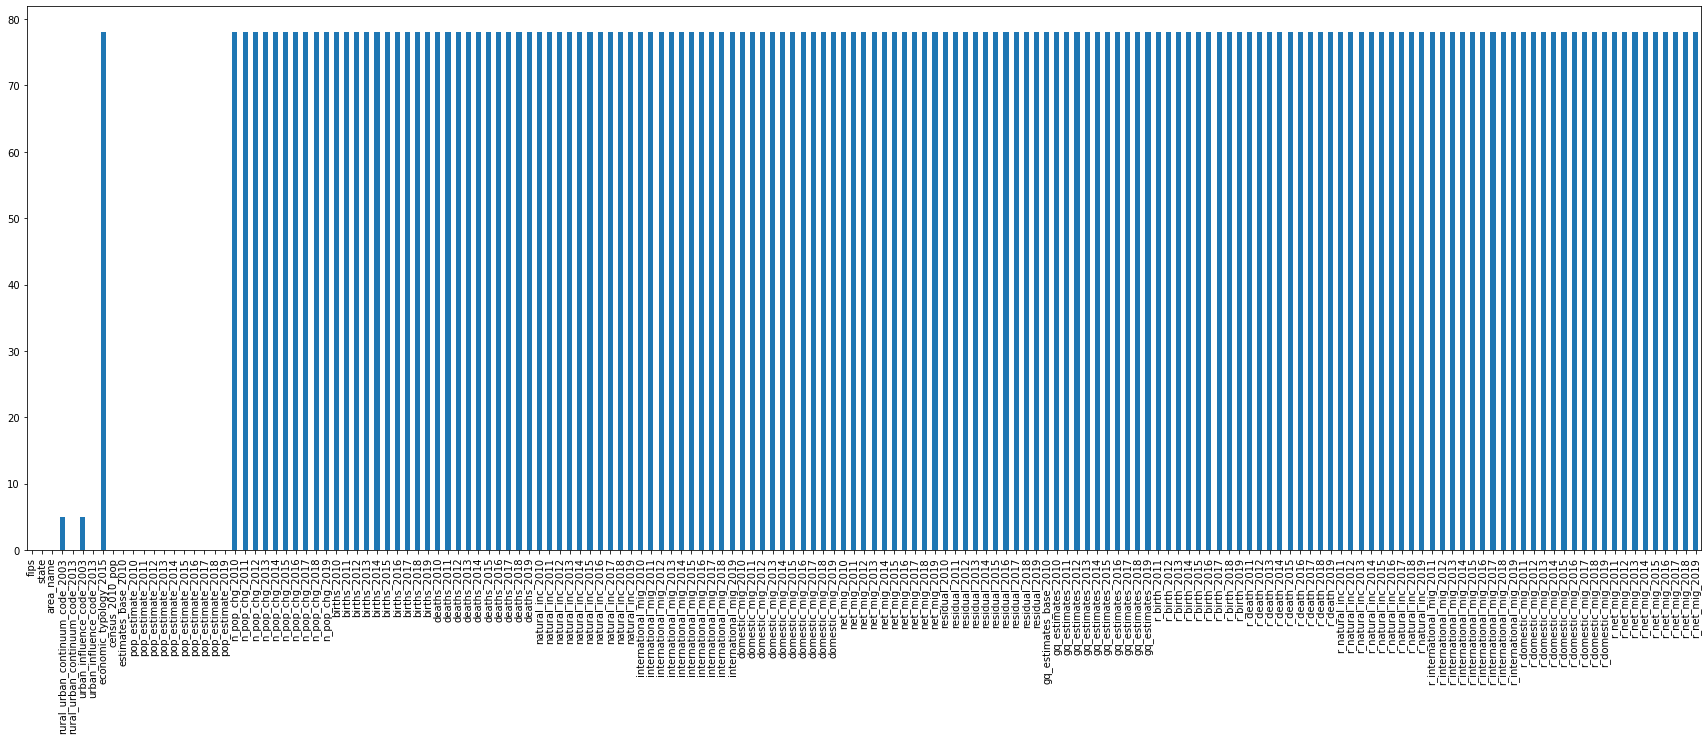

In [231]:
show_na(population_estimates_df)

**Rural-Urban Continuum Codes (https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx)**  
The 2013 Rural-Urban Continuum Codes form a classification scheme that distinguishes metropolitan counties by the population size of their metro area, and nonmetropolitan counties by degree of urbanization and adjacency to a metro area. The official Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into three metro and six nonmetro categories. Each county in the U.S., municipio in Puerto Rico, and Census Bureau-designated county-equivalent area of the Virgin Islands/other inhabited island territories of the U.S. is assigned one of the 9 codes. This scheme allows researchers to break county data into finer residential groups, beyond metro and nonmetro, particularly for the analysis of trends in nonmetro areas that are related to population density and metro influence. The Rural-Urban Continuum Codes were originally developed in 1974. They have been updated each decennial since (1983, 1993, 2003, 2013), and slightly revised in 1988. Note that the 2013 Rural-Urban Continuum Codes are not directly comparable with the codes prior to 2000 because of the new methodology used in developing the 2000 metropolitan areas.

**Urban Influence Codes (https://www.ers.usda.gov/data-products/urban-influence-codes/)**  
The 2013 Urban Influence Codes form a classification scheme that distinguishes metropolitan counties by population size of their metro area, and nonmetropolitan counties by size of the largest city or town and proximity to metro and micropolitan areas. The standard Office of Management and Budget (OMB) metro and nonmetro categories have been subdivided into two metro and 10 nonmetro categories, resulting in a 12-part county classification. This scheme was originally developed in 1993. This scheme allows researchers to break county data into finer residential groups, beyond metro and nonmetro, particularly for the analysis of trends in nonmetro areas that are related to population density and metro influence. 

**Rural-urban_Continuum Code_2003 (source: https://seer.cancer.gov/seerstat/variables/countyattribs/Rural.Urban.Continuum.Codes.1974.1983.1993.2003.2013.pdf)**
- FIPStxt: 2105 | State: AK -> 9
- FIPStxt: 2195 | State: AK -> 9
- FIPStxt: 2198 | State: AK -> 9
- FIPStxt: 2230 | State: AK -> 9
- FIPStxt: 2275 | State: AK -> 9

**Urban_Influence_Code_2003 (source: https://www.ers.usda.gov/data-products/urban-influence-codes/)**
- FIPStxt: 2105 | State: AK -> 10
- FIPStxt: 2195 | State: AK -> 11
- FIPStxt: 2198 | State: AK -> 10
- FIPStxt: 2230 | State: AK -> 12
- FIPStxt: 2275 | State: AK -> 12

In [232]:
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02105", "rural_urban_continuum_code_2003", 9)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02195", "rural_urban_continuum_code_2003", 9)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02198", "rural_urban_continuum_code_2003", 9)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02230", "rural_urban_continuum_code_2003", 9)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02275", "rural_urban_continuum_code_2003", 9)

population_estimates_df = replace_hard_on_fips(population_estimates_df, "02105", "urban_influence_code_2003", 10)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02195", "urban_influence_code_2003", 11)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02198", "urban_influence_code_2003", 10)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02230", "urban_influence_code_2003", 12)
population_estimates_df = replace_hard_on_fips(population_estimates_df, "02275", "urban_influence_code_2003", 12)

**Puerto Rico (PR) manque trop de valeurs, nous ne pouvons pas les imputer avec des valeurs pertinente, nous abandonnons alors le Puerto Rico**

In [233]:
population_estimates_df = delete_pr(population_estimates_df)

In [234]:
assert show_na(population_estimates_df) == 0

No null values


In [235]:
save_df(population_estimates_df, "PopulationEstimates")

fips state          area_name  rural_urban_continuum_code_2003  \
2     01001    AL     Autauga County                              2.0   
3     01003    AL     Baldwin County                              4.0   
4     01005    AL     Barbour County                              6.0   
5     01007    AL        Bibb County                              1.0   
6     01009    AL      Blount County                              1.0   
...     ...   ...                ...                              ...   
3189  56037    WY  Sweetwater County                              5.0   
3190  56039    WY       Teton County                              7.0   
3191  56041    WY       Uinta County                              7.0   
3192  56043    WY    Washakie County                              7.0   
3193  56045    WY      Weston County                              7.0   

      rural_urban_continuum_code_2013  urban_influence_code_2003  \
2                                 2.0                        2.0   
3                                 3.0                        5.0   
4                                 6.0                        6.0   
5                                 1.0                        1.0   
6                                 1.0                        1.0   
...                               ...                        ...   
3189                              5.0                        8.0   
3190                              7.0                        8.0   
3191                              7.0                        8.0   
3192                              7.0                       11.0   
3193                              7.0                        9.0   

      urban_influence_code_2013  economic_typology_2015  census_2010_pop  \
2                           2.0                     0.0            54571   
3                           2.0                     5.0           182265   
4                           6.0                     3.0            27457   
5                           1.0                     0.0            22915   
6                           1.0                     0.0            57322   
...                         ...                     ...              ...   
3189                        8.0                     2.0            43806   
3190                        8.0                     5.0            21294   
3191                        8.0                     2.0            21118   
3192                       11.0                     0.0             8533   
3193                        9.0                     2.0             7208   

      estimates_base_2010  ...  r_domestic_mig_2019  r_net_mig_2011  \
2                   54597  ...             4.847310        6.018182   
3                  182265  ...            24.017829       16.641870   
4                   27455  ...            -5.690302        0.292676   
5                   22915  ...             1.385134       -4.998356   
6                   57322  ...             1.020788        0.208812   
...                   ...  ...                  ...             ...   
3189                43806  ...           -17.605427        0.502513   
3190                21298  ...            -1.583464       -2.575509   
3191                21121  ...            -9.181105      -18.196975   
3192                 8528  ...            -7.652085      -12.839390   
3193                 7208  ...             0.000000       -9.065551   

      r_net_mig_2012  r_net_mig_2013  r_net_mig_2014  r_net_mig_2015  \
2          -6.226119       -3.902226        1.970443       -1.712875   
3          17.488579       22.751474       20.184334       17.725964   
4          -6.897817       -8.132185       -5.140431      -15.724575   
5          -3.787545       -5.797999        1.331144        1.329817   
6          -1.650165       -0.347225       -2.049590       -1.338525   
...              ...             ...             ...             ...   
3189       15.035735       -4.614071      -

### PovertyEstimates

In [236]:
poverity_estimates_df: pd.DataFrame = dfs["PovertyEstimates"]
poverity_estimates_df = normalize_columns(poverity_estimates_df, "FIPStxt", "Stabr")
poverity_estimates_df = delete_us(poverity_estimates_df)
poverity_estimates_df = delete_states(poverity_estimates_df)
poverity_estimates_df = delete_pr(poverity_estimates_df)
poverity_estimates_df

fips state          area_name  rural_urban_continuum_code_2003  \
2     01001    AL     Autauga County                              2.0   
3     01003    AL     Baldwin County                              4.0   
4     01005    AL     Barbour County                              6.0   
5     01007    AL        Bibb County                              1.0   
6     01009    AL      Blount County                              1.0   
...     ...   ...                ...                              ...   
3188  56037    WY  Sweetwater County                              5.0   
3189  56039    WY       Teton County                              7.0   
3190  56041    WY       Uinta County                              7.0   
3191  56043    WY    Washakie County                              7.0   
3192  56045    WY      Weston County                              7.0   

      urban_influence_code_2003  rural_urban_continuum_code_2013  \
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
5                           1.0                              1.0   
6                           1.0                              1.0   
...                         ...                              ...   
3188                        8.0                              5.0   
3189                        8.0                              7.0   
3190                        8.0                              7.0   
3191                       11.0                              7.0   
3192                        9.0                              7.0   

      urban_influence_code_2013  povall_2019  ci90lball_2019  ci90uball_2019  \
2                           2.0         6723            5517            7929   
3                           2.0        22360           18541           26179   
4                           6.0         5909            4787            7031   
5                           1.0         4101            3225            4977   
6                           1.0         9324            8037           10611   
...                         ...          ...             ...             ...   
3188                        8.0         3453            2743            4163   
3189                        8.0         1396            1073            1719   
3190                        8.0         1699            1264            2134   
3191                       11.0          845             626            1064   
3192                        9.0          692             523             861   

      ...  ci90ub517p_2019  medhhinc_2019  ci90lbinc_2019  ci90ubinc_2019  \
2     ...             19.4          58233           52517           63949   
3     ...             17.2          59871           54593           65149   
4     ...             49.0          35972           31822           40122   
5     ...             32.7          47918           42291           53545   
6     ...             25.8          52902           46777           59027   
...   ...              ...            ...             ...             ...   
3188  ...             11.1          80639           73437           87841   
3189  ...              6.7          98837           86531          111143   
3190  ...             11.1          70756           63191           78321   
3191  ...             17.4          55122           50050           60194   
3192  ...             16.7          59410           52275           66545   

      pov04_2019  ci90lb04_2019  ci90ub04_2019  pctpov04_2019  ci90lb04p_2019  \
2            NaN            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN            NaN             NaN   
5            NaN            NaN            NaN            NaN             NaN   
6            NaN      

rural_urban_continuum_code_2003: 5
urban_influence_code_2003: 5
pov04_2019: 3141
ci90lb04_2019: 3141
ci90ub04_2019: 3141
pctpov04_2019: 3141
ci90lb04p_2019: 3141
ci90ub04p_2019: 3141
fips: 01001 | state: AL | area_name: Autauga County | rural_urban_continuum_code_2003: 2.0 | urban_influence_code_2003: 2.0 | rural_urban_continuum_code_2013: 2.0 | urban_influence_code_2013: 2.0 | povall_2019: 6723 | ci90lball_2019: 5517 | ci90uball_2019: 7929 | pctpovall_2019: 12.1 | ci90lballp_2019: 9.9 | ci90uballp_2019: 14.3 | pov017_2019: 2040 | ci90lb017_2019: 1472 | ci90ub017_2019: 2608 | pctpov017_2019: 15.9 | ci90lb017p_2019: 11.5 | ci90ub017p_2019: 20.3 | pov517_2019: 1376 | ci90lb517_2019: 902 | ci90ub517_2019: 1850 | pctpov517_2019: 14.4 | ci90lb517p_2019: 9.4 | ci90ub517p_2019: 19.4 | medhhinc_2019: 58233 | ci90lbinc_2019: 52517 | ci90ubinc_2019: 63949 | pov04_2019: nan | ci90lb04_2019: nan | ci90ub04_2019: nan | pctpov04_2019: nan | ci90lb04p_2019: nan | ci90ub04p_2019: nan | 
fips: 01003 | 

3141

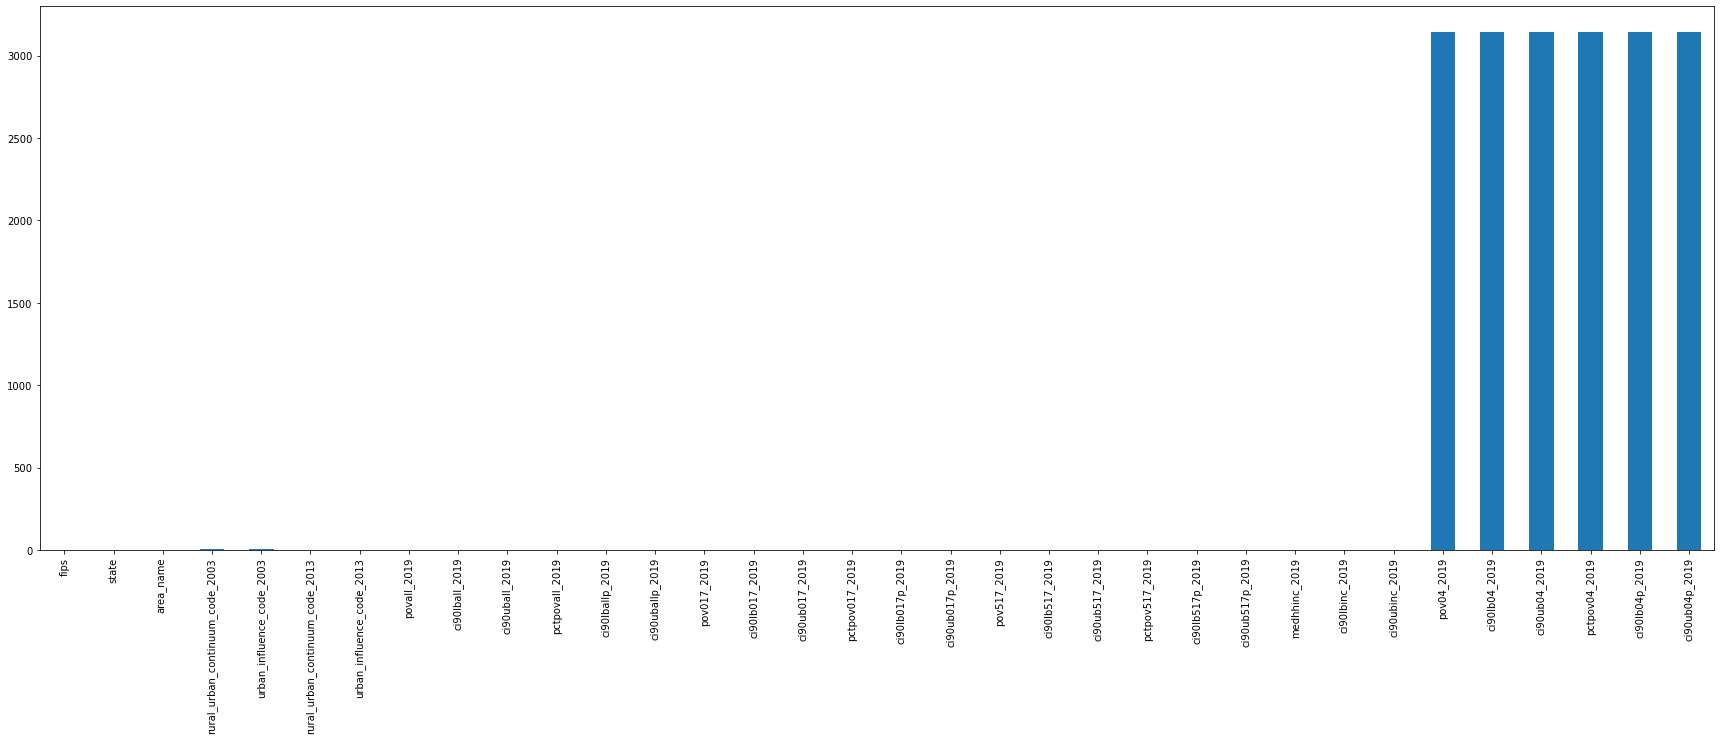

In [237]:
show_na(poverity_estimates_df)

**rural_urban_continuum_code_2003 basé sur celui de 2013 (source: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx)**
- fips: 02105 | state: AK -> 10
- fips: 02195 | state: AK -> 11
- fips: 02198 | state: AK -> 10
- fips: 02230 | state: AK -> 12
- fips: 02275 | state: AK -> 12

In [238]:
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02105", "rural_urban_continuum_code_2003", 10)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02195", "rural_urban_continuum_code_2003", 11)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02198", "rural_urban_continuum_code_2003", 10)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02230", "rural_urban_continuum_code_2003", 12)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02275", "rural_urban_continuum_code_2003", 12)

**urban_influence_code_2003 basé sur celui de 2013 (source: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes.aspx)**
- fips: 02105 | state: AK -> 10
- fips: 02195 | state: AK -> 11
- fips: 02198 | state: AK -> 10
- fips: 02230 | state: AK -> 12
- fips: 02275 | state: AK -> 12

In [239]:
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02105", "urban_influence_code_2003", 10)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02195", "urban_influence_code_2003", 11)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02198", "urban_influence_code_2003", 10)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02230", "urban_influence_code_2003", 12)
poverity_estimates_df = replace_hard_on_fips(poverity_estimates_df, "02275", "urban_influence_code_2003", 12)

**pov04_2019, ci90lb04_2019, ci90ub04_2019, pctpov04_2019, ci90lb04p_2019, ci90ub04p_2019**  
Colonnes complètements vides -> suppression

In [240]:
poverity_estimates_df = poverity_estimates_df.drop(columns=[
    "pov04_2019",
    "ci90lb04_2019",
    "ci90ub04_2019",
    "pctpov04_2019",
    "ci90lb04p_2019",
    "ci90ub04p_2019"
])

In [241]:
assert show_na(poverity_estimates_df) == 0

No null values


In [242]:
save_df(poverity_estimates_df, "PovertyEstimates")

fips state          area_name  rural_urban_continuum_code_2003  \
2     01001    AL     Autauga County                              2.0   
3     01003    AL     Baldwin County                              4.0   
4     01005    AL     Barbour County                              6.0   
5     01007    AL        Bibb County                              1.0   
6     01009    AL      Blount County                              1.0   
...     ...   ...                ...                              ...   
3188  56037    WY  Sweetwater County                              5.0   
3189  56039    WY       Teton County                              7.0   
3190  56041    WY       Uinta County                              7.0   
3191  56043    WY    Washakie County                              7.0   
3192  56045    WY      Weston County                              7.0   

      urban_influence_code_2003  rural_urban_continuum_code_2013  \
2                           2.0                              2.0   
3                           5.0                              3.0   
4                           6.0                              6.0   
5                           1.0                              1.0   
6                           1.0                              1.0   
...                         ...                              ...   
3188                        8.0                              5.0   
3189                        8.0                              7.0   
3190                        8.0                              7.0   
3191                       11.0                              7.0   
3192                        9.0                              7.0   

      urban_influence_code_2013  povall_2019  ci90lball_2019  ci90uball_2019  \
2                           2.0         6723            5517            7929   
3                           2.0        22360           18541           26179   
4                           6.0         5909            4787            7031   
5                           1.0         4101            3225            4977   
6                           1.0         9324            8037           10611   
...                         ...          ...             ...             ...   
3188                        8.0         3453            2743            4163   
3189                        8.0         1396            1073            1719   
3190                        8.0         1699            1264            2134   
3191                       11.0          845             626            1064   
3192                        9.0          692             523             861   

      ...  ci90ub017p_2019  pov517_2019  ci90lb517_2019  ci90ub517_2019  \
2     ...             20.3         1376             902            1850   
3     ...             17.4         4641            3295            5987   
4     ...             50.8         1468            1114            1822   
5     ...             33.1          808             566            1050   
6     ...             25.3         2067            1641            2493   
...   ...              ...          ...             ...             ...   
3188  ...             13.0          644             416             872   
3189  ...              7.8          142              83             201   
3190  ...             13.1          336             193             479   
3191  ...             18.9          160              94             226   
3192  ...             18.7          120              70             170   

      pctpov517_2019  ci90lb517p_2019  ci90ub517p_2019  medhhinc_2019  \
2               14.4              9.4             19.4          58233   
3               13.3              9.4             17.2          59871   
4               39.5             30.0             49.0          35972   
5               25.2             17.7             32.7          47918   
6               21.4             17.0             25.8          52902   
...          

## Unemployment

In [243]:
unemployment_df: pd.DataFrame = dfs["Unemployment"]
unemployment_df = normalize_columns(unemployment_df, "FIPS_Code")
unemployment_df = delete_us(unemployment_df)
unemployment_df = delete_states(unemployment_df)
unemployment_df = delete_pr(unemployment_df)
unemployment_df

fips state              area_name  rural_urban_continuum_code_2013  \
2     01001    AL     Autauga County, AL                              2.0   
3     01003    AL     Baldwin County, AL                              3.0   
4     01005    AL     Barbour County, AL                              6.0   
5     01007    AL        Bibb County, AL                              1.0   
6     01009    AL      Blount County, AL                              1.0   
...     ...   ...                    ...                              ...   
3191  56037    WY  Sweetwater County, WY                              5.0   
3192  56039    WY       Teton County, WY                              7.0   
3193  56041    WY       Uinta County, WY                              7.0   
3194  56043    WY    Washakie County, WY                              7.0   
3195  56045    WY      Weston County, WY                              7.0   

      urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
2                           2.0         1.0                    21861.0   
3                           2.0         1.0                    69979.0   
4                           6.0         0.0                    11449.0   
5                           1.0         1.0                     8623.0   
6                           1.0         1.0                    25266.0   
...                         ...         ...                        ...   
3191                        8.0         0.0                    20623.0   
3192                        8.0         0.0                    14126.0   
3193                        8.0         0.0                    10414.0   
3194                       11.0         0.0                     4287.0   
3195                        9.0         0.0                     3284.0   

      employed_2000  unemployed_2000  unemployment_rate_2000  ...  \
2           20971.0            890.0                     4.1  ...   
3           67370.0           2609.0                     3.7  ...   
4           10812.0            637.0                     5.6  ...   
5            8160.0            463.0                     5.4  ...   
6           24375.0            891.0                     3.5  ...   
...             ...              ...                     ...  ...   
3191        19822.0            801.0                     3.9  ...   
3192        13791.0            335.0                     2.4  ...   
3193        10004.0            410.0                     3.9  ...   
3194         4093.0            194.0                     4.5  ...   
3195         3147.0            137.0                     4.2  ...   

      civilian_labor_force_2019  employed_2019  unemployed_2019  \
2                       26281.0        25561.0            720.0   
3                       97424.0        94713.0           2711.0   
4                        8502.0         8177.0            325.0   
5                        8639.0         8371.0            268.0   
6                       25196.0        24516.0            680.0   
...                         ...            ...              ...   
3191                    21424.0        20568.0            856.0   
3192                    15970.0        15521.0            449.0   
3193                     9280.0         8912.0            368.0   
3194                     3904.0         3742.0            162.0   
3195                     3819.0         3704.0            115.0   

      unemployment_rate_2019  civilian_labor_force_2020  employed_2020  \
2                        2.7                    25838.0        24576.0   
3                        2.8                    96763.0        91338.0   
4                        3.8                     8587.0         7982.0   
5                        3.1                     8640.0         8067.0   
6                        2.7                    24661.0        23653.0   
...                      ...                        ...            ...   
3191                     4.0             

rural_urban_continuum_code_2013: 3
urban_influence_code_2013: 3
civilian_labor_force_2000: 5
employed_2000: 5
unemployed_2000: 5
unemployment_rate_2000: 5
civilian_labor_force_2001: 5
employed_2001: 5
unemployed_2001: 5
unemployment_rate_2001: 5
civilian_labor_force_2002: 5
employed_2002: 5
unemployed_2002: 5
unemployment_rate_2002: 5
civilian_labor_force_2003: 5
employed_2003: 5
unemployed_2003: 5
unemployment_rate_2003: 5
civilian_labor_force_2004: 5
employed_2004: 5
unemployed_2004: 5
unemployment_rate_2004: 5
civilian_labor_force_2005: 12
employed_2005: 12
unemployed_2005: 12
unemployment_rate_2005: 12
civilian_labor_force_2006: 12
employed_2006: 12
unemployed_2006: 12
unemployment_rate_2006: 12
civilian_labor_force_2007: 5
employed_2007: 5
unemployed_2007: 5
unemployment_rate_2007: 5
civilian_labor_force_2008: 5
employed_2008: 5
unemployed_2008: 5
unemployment_rate_2008: 5
civilian_labor_force_2009: 5
employed_2009: 5
unemployed_2009: 5
unemployment_rate_2009: 5
civilian_labor_for

15

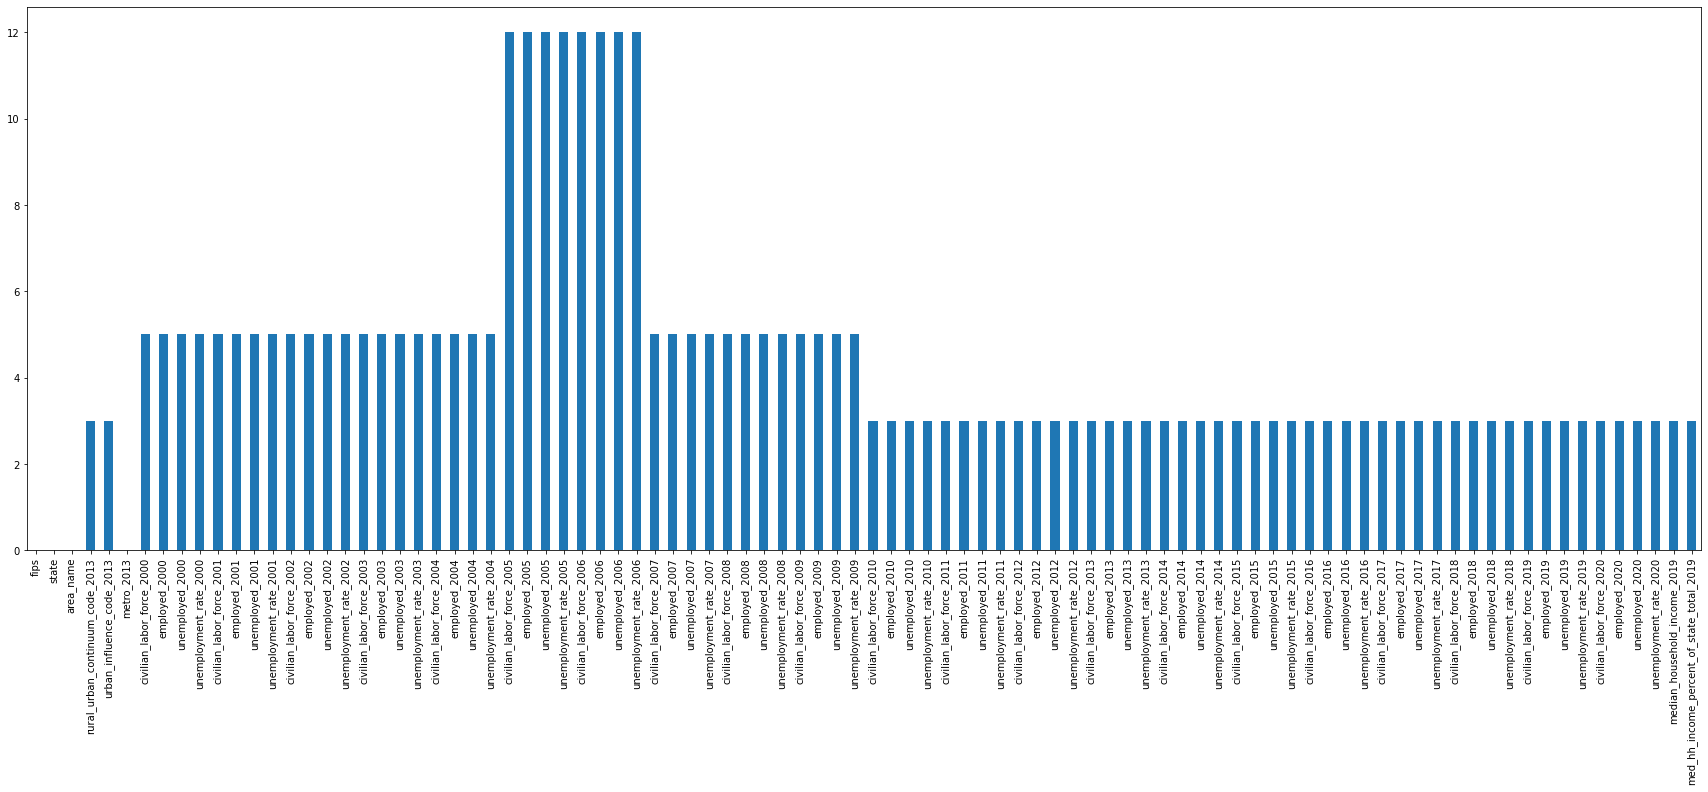

In [244]:
show_na(unemployment_df)

**Pour toutes ces valeurs on peut les imputer avec la moyenne de leurs états respectifs**

In [245]:
numeric_cols = unemployment_df.select_dtypes(include=np.number).columns
unemployment_df[numeric_cols] = unemployment_df.groupby("state")[numeric_cols].transform(lambda x: x.fillna(x.mean()))

unemployment_df

fips state              area_name  rural_urban_continuum_code_2013  \
2     01001    AL     Autauga County, AL                              2.0   
3     01003    AL     Baldwin County, AL                              3.0   
4     01005    AL     Barbour County, AL                              6.0   
5     01007    AL        Bibb County, AL                              1.0   
6     01009    AL      Blount County, AL                              1.0   
...     ...   ...                    ...                              ...   
3191  56037    WY  Sweetwater County, WY                              5.0   
3192  56039    WY       Teton County, WY                              7.0   
3193  56041    WY       Uinta County, WY                              7.0   
3194  56043    WY    Washakie County, WY                              7.0   
3195  56045    WY      Weston County, WY                              7.0   

      urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
2                           2.0         1.0                    21861.0   
3                           2.0         1.0                    69979.0   
4                           6.0         0.0                    11449.0   
5                           1.0         1.0                     8623.0   
6                           1.0         1.0                    25266.0   
...                         ...         ...                        ...   
3191                        8.0         0.0                    20623.0   
3192                        8.0         0.0                    14126.0   
3193                        8.0         0.0                    10414.0   
3194                       11.0         0.0                     4287.0   
3195                        9.0         0.0                     3284.0   

      employed_2000  unemployed_2000  unemployment_rate_2000  ...  \
2           20971.0            890.0                     4.1  ...   
3           67370.0           2609.0                     3.7  ...   
4           10812.0            637.0                     5.6  ...   
5            8160.0            463.0                     5.4  ...   
6           24375.0            891.0                     3.5  ...   
...             ...              ...                     ...  ...   
3191        19822.0            801.0                     3.9  ...   
3192        13791.0            335.0                     2.4  ...   
3193        10004.0            410.0                     3.9  ...   
3194         4093.0            194.0                     4.5  ...   
3195         3147.0            137.0                     4.2  ...   

      civilian_labor_force_2019  employed_2019  unemployed_2019  \
2                       26281.0        25561.0            720.0   
3                       97424.0        94713.0           2711.0   
4                        8502.0         8177.0            325.0   
5                        8639.0         8371.0            268.0   
6                       25196.0        24516.0            680.0   
...                         ...            ...              ...   
3191                    21424.0        20568.0            856.0   
3192                    15970.0        15521.0            449.0   
3193                     9280.0         8912.0            368.0   
3194                     3904.0         3742.0            162.0   
3195                     3819.0         3704.0            115.0   

      unemployment_rate_2019  civilian_labor_force_2020  employed_2020  \
2                        2.7                    25838.0        24576.0   
3                        2.8                    96763.0        91338.0   
4                        3.8                     8587.0         7982.0   
5                        3.1                     8640.0         8067.0   
6                        2.7                    24661.0        23653.0   
...                      ...                        ...            ...   
3191                     4.0             

In [246]:
assert show_na(unemployment_df) == 0

No null values


In [247]:
save_df(unemployment_df, "Unemployment")

fips state              area_name  rural_urban_continuum_code_2013  \
2     01001    AL     Autauga County, AL                              2.0   
3     01003    AL     Baldwin County, AL                              3.0   
4     01005    AL     Barbour County, AL                              6.0   
5     01007    AL        Bibb County, AL                              1.0   
6     01009    AL      Blount County, AL                              1.0   
...     ...   ...                    ...                              ...   
3191  56037    WY  Sweetwater County, WY                              5.0   
3192  56039    WY       Teton County, WY                              7.0   
3193  56041    WY       Uinta County, WY                              7.0   
3194  56043    WY    Washakie County, WY                              7.0   
3195  56045    WY      Weston County, WY                              7.0   

      urban_influence_code_2013  metro_2013  civilian_labor_force_2000  \
2                           2.0         1.0                    21861.0   
3                           2.0         1.0                    69979.0   
4                           6.0         0.0                    11449.0   
5                           1.0         1.0                     8623.0   
6                           1.0         1.0                    25266.0   
...                         ...         ...                        ...   
3191                        8.0         0.0                    20623.0   
3192                        8.0         0.0                    14126.0   
3193                        8.0         0.0                    10414.0   
3194                       11.0         0.0                     4287.0   
3195                        9.0         0.0                     3284.0   

      employed_2000  unemployed_2000  unemployment_rate_2000  ...  \
2           20971.0            890.0                     4.1  ...   
3           67370.0           2609.0                     3.7  ...   
4           10812.0            637.0                     5.6  ...   
5            8160.0            463.0                     5.4  ...   
6           24375.0            891.0                     3.5  ...   
...             ...              ...                     ...  ...   
3191        19822.0            801.0                     3.9  ...   
3192        13791.0            335.0                     2.4  ...   
3193        10004.0            410.0                     3.9  ...   
3194         4093.0            194.0                     4.5  ...   
3195         3147.0            137.0                     4.2  ...   

      civilian_labor_force_2019  employed_2019  unemployed_2019  \
2                       26281.0        25561.0            720.0   
3                       97424.0        94713.0           2711.0   
4                        8502.0         8177.0            325.0   
5                        8639.0         8371.0            268.0   
6                       25196.0        24516.0            680.0   
...                         ...            ...              ...   
3191                    21424.0        20568.0            856.0   
3192                    15970.0        15521.0            449.0   
3193                     9280.0         8912.0            368.0   
3194                     3904.0         3742.0            162.0   
3195                     3819.0         3704.0            115.0   

      unemployment_rate_2019  civilian_labor_force_2020  employed_2020  \
2                        2.7                    25838.0        24576.0   
3                        2.8                    96763.0        91338.0   
4                        3.8                     8587.0         7982.0   
5                        3.1                     8640.0         8067.0   
6                        2.7                    24661.0        23653.0   
...                      ...                        ...            ...   
3191                     4.0             

## countypres

In [248]:
countypres_df: pd.DataFrame = dfs["countypres_2000-2020"]
countypres_df.rename(columns={"state": "full_state_name"}, inplace=True)
countypres_df = normalize_columns(countypres_df, "county_fips", "state_po")
countypres_df

year full_state_name state county_name     fips        office  \
0      2000         ALABAMA    AL     AUTAUGA   1001.0     PRESIDENT   
1      2000         ALABAMA    AL     AUTAUGA   1001.0     PRESIDENT   
2      2000         ALABAMA    AL     AUTAUGA   1001.0     PRESIDENT   
3      2000         ALABAMA    AL     AUTAUGA   1001.0     PRESIDENT   
4      2000         ALABAMA    AL     BALDWIN   1003.0     PRESIDENT   
...     ...             ...   ...         ...      ...           ...   
72612  2020         WYOMING    WY    WASHAKIE  56043.0  US PRESIDENT   
72613  2020         WYOMING    WY      WESTON  56045.0  US PRESIDENT   
72614  2020         WYOMING    WY      WESTON  56045.0  US PRESIDENT   
72615  2020         WYOMING    WY      WESTON  56045.0  US PRESIDENT   
72616  2020         WYOMING    WY      WESTON  56045.0  US PRESIDENT   

               candidate        party  candidatevotes  totalvotes   version  \
0                AL GORE     DEMOCRAT          4942.0     17208.0  20191203   
1         GEORGE W. BUSH   REPUBLICAN         11993.0     17208.0  20191203   
2            RALPH NADER        GREEN           160.0     17208.0  20191203   
3                  OTHER        OTHER           113.0     17208.0  20191203   
4                AL GORE     DEMOCRAT         13997.0     56480.0  20191203   
...                  ...          ...             ...         ...       ...   
72612     DONALD J TRUMP   REPUBLICAN          3245.0      4032.0  20210622   
72613  JOSEPH R BIDEN JR     DEMOCRAT           360.0      3560.0  20210622   
72614       JO JORGENSEN  LIBERTARIAN            46.0      3560.0  20210622   
72615              OTHER        OTHER            47.0      3560.0  20210622   
72616     DONALD J TRUMP   REPUBLICAN          3107.0      3560.0  20210622   

        mode  
0      TOTAL  
1      TOTAL  
2      TOTAL  
3      TOTAL  
4      TOTAL  
...      ...  
72612  TOTAL  
72613  TOTAL  
72614  TOTAL  
72615  TOTAL  
72616  TOTAL  

[72617 rows x 12 columns]

state: 64
candidatevotes: 405
totalvotes: 5
year: 2000 | full_state_name: GEORGIA | state: GA | county_name: BAKER | fips: 13007.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 1519.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GA | county_name: BEN HILL | fips: 13017.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 4661.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GA | county_name: BERRIEN | fips: 13019.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 4410.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GA | county_name: BRYAN | fips: 13029.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 7059.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | sta

424

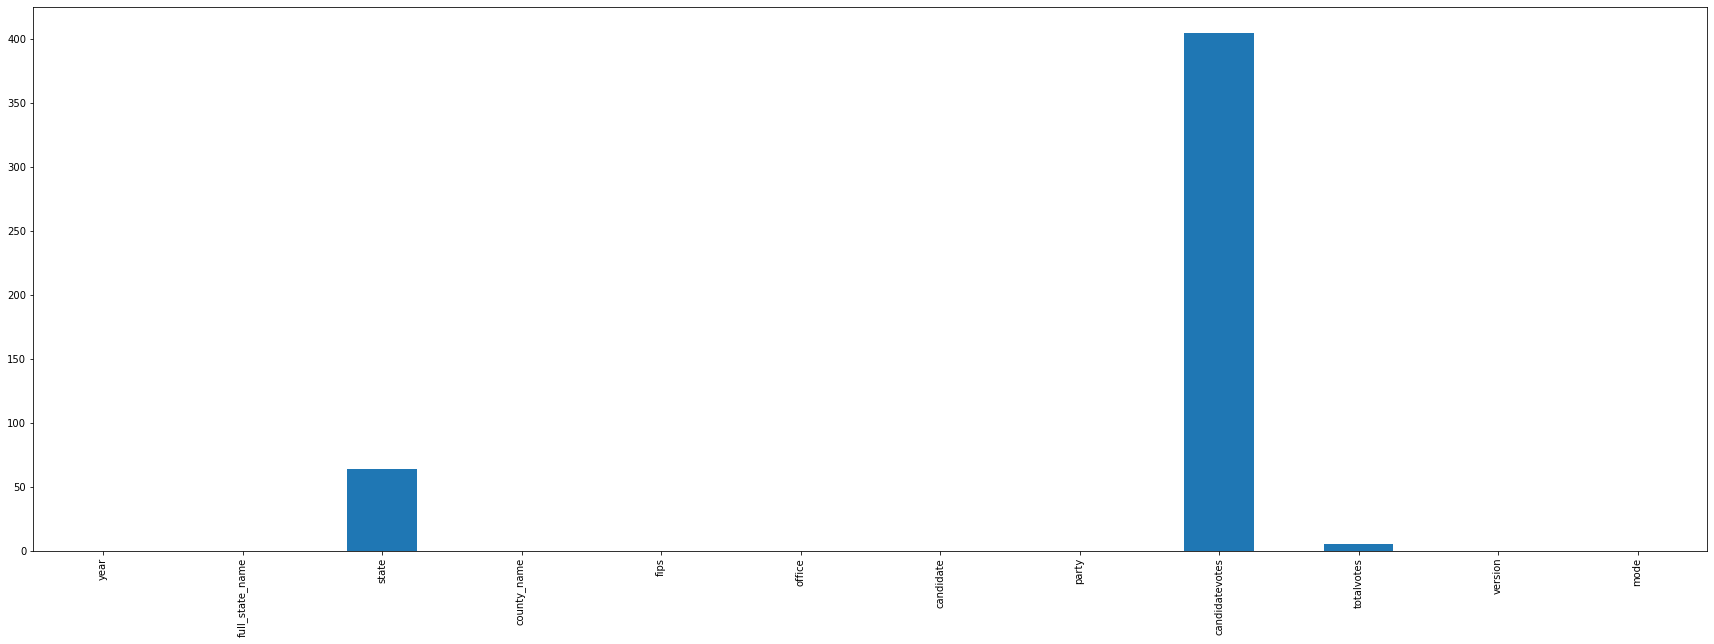

In [249]:
show_na(countypres_df)

candidatevotes: 405
totalvotes: 5
year: 2000 | full_state_name: GEORGIA | state: GEORGIA | county_name: BAKER | fips: 13007.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 1519.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GEORGIA | county_name: BEN HILL | fips: 13017.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 4661.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GEORGIA | county_name: BERRIEN | fips: 13019.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 4410.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEORGIA | state: GEORGIA | county_name: BRYAN | fips: 13029.0 | office: PRESIDENT | candidate: RALPH NADER | party: GREEN | candidatevotes: nan | totalvotes: 7059.0 | version: 20191203 | mode: TOTAL | 
year: 2000 | full_state_name: GEO

409

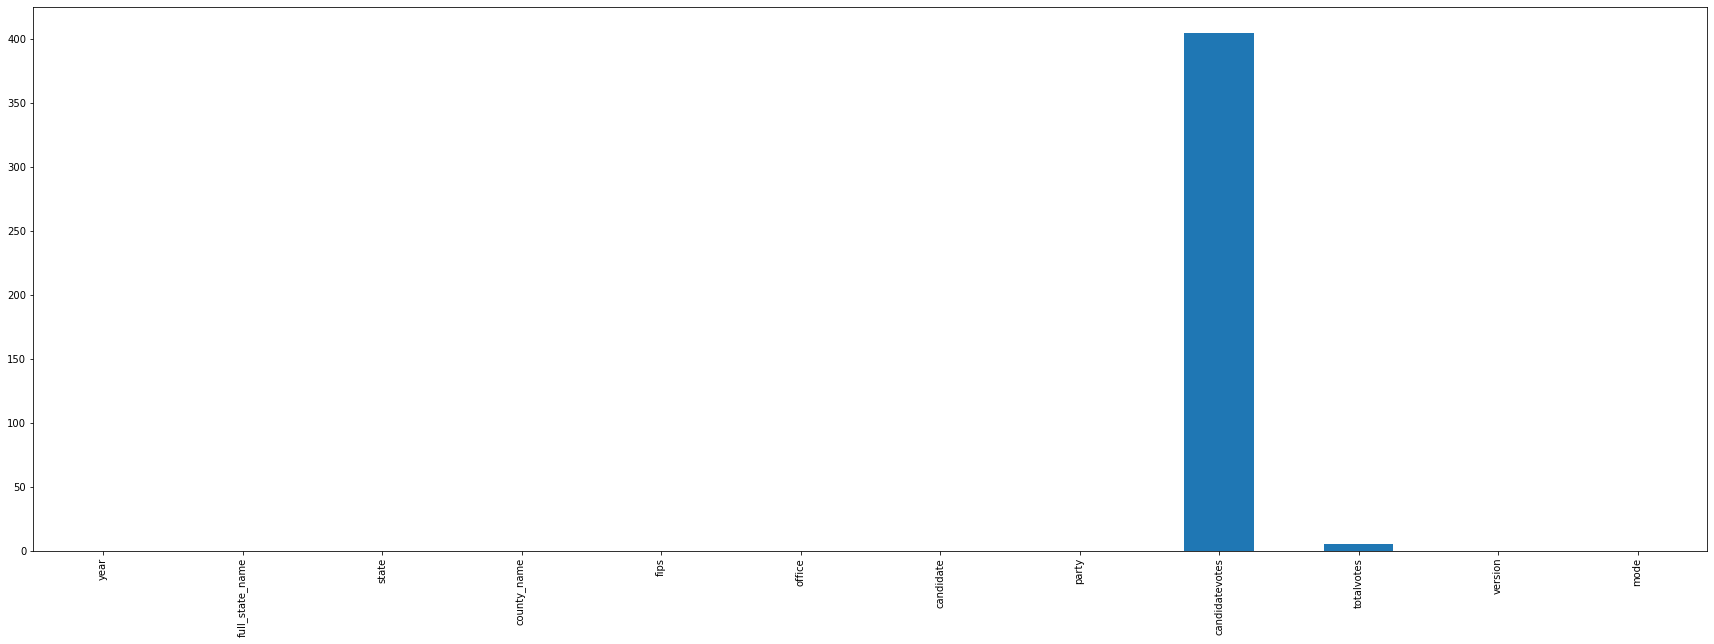

In [250]:
missing_states = {
    "connecticut": "CT",
    "alaska": "AK",
    "rhode island": "RI",
    "maine": "ME",
}

countypres_df["state"] = countypres_df["full_state_name"].apply(lambda x: missing_states[x] if x in missing_states else x)

show_na(countypres_df)

In [251]:
save_df(countypres_df, "countypres_2000-2020")

year full_state_name    state county_name     fips        office  \
0      2000         ALABAMA  ALABAMA     AUTAUGA   1001.0     PRESIDENT   
1      2000         ALABAMA  ALABAMA     AUTAUGA   1001.0     PRESIDENT   
2      2000         ALABAMA  ALABAMA     AUTAUGA   1001.0     PRESIDENT   
3      2000         ALABAMA  ALABAMA     AUTAUGA   1001.0     PRESIDENT   
4      2000         ALABAMA  ALABAMA     BALDWIN   1003.0     PRESIDENT   
...     ...             ...      ...         ...      ...           ...   
72612  2020         WYOMING  WYOMING    WASHAKIE  56043.0  US PRESIDENT   
72613  2020         WYOMING  WYOMING      WESTON  56045.0  US PRESIDENT   
72614  2020         WYOMING  WYOMING      WESTON  56045.0  US PRESIDENT   
72615  2020         WYOMING  WYOMING      WESTON  56045.0  US PRESIDENT   
72616  2020         WYOMING  WYOMING      WESTON  56045.0  US PRESIDENT   

               candidate        party  candidatevotes  totalvotes   version  \
0                AL GORE     DEMOCRAT          4942.0     17208.0  20191203   
1         GEORGE W. BUSH   REPUBLICAN         11993.0     17208.0  20191203   
2            RALPH NADER        GREEN           160.0     17208.0  20191203   
3                  OTHER        OTHER           113.0     17208.0  20191203   
4                AL GORE     DEMOCRAT         13997.0     56480.0  20191203   
...                  ...          ...             ...         ...       ...   
72612     DONALD J TRUMP   REPUBLICAN          3245.0      4032.0  20210622   
72613  JOSEPH R BIDEN JR     DEMOCRAT           360.0      3560.0  20210622   
72614       JO JORGENSEN  LIBERTARIAN            46.0      3560.0  20210622   
72615              OTHER        OTHER            47.0      3560.0  20210622   
72616     DONALD J TRUMP   REPUBLICAN          3107.0      3560.0  20210622   

        mode  
0      TOTAL  
1      TOTAL  
2      TOTAL  
3      TOTAL  
4      TOTAL  
...      ...  
72612  TOTAL  
72613  TOTAL  
72614  TOTAL  
72615  TOTAL  
72616  TOTAL  

[72617 rows x 12 columns]